# Prelieminary exploratory sentiment analysis

Help for 1 person investigation of Facebook Messenger Data
- https://www.dideo.ir/v/yt/z9W2cvmFPuA/livestream%3A-analyzing-facebook-messenger-data

In [ ]:
# Prepare Drive
from google.colab 
import drive
drive.mount('/content/drive')

In [ ]:
# Load json
import json

# Set Path
path_to_file = '/content/drive/MyDrive/NLProc Exam/inbox/lenahansen_ceiut78jca/message_1.json' #or haniamatera_z-vfy21ckg

# Import json
with open(path_to_file) as file:
    chat_history = json.load(file)

In [ ]:
#Check
chat_history

In [ ]:
# Print keynames
chat_history.keys()

dict_keys(['participants', 'messages', 'title', 'is_still_participant', 'thread_type', 'thread_path'])

In [ ]:
#Check Messages key
chat_history['messages']

In [ ]:
# Import pandas
import pandas as pd

In [ ]:
# DataFrame Creation
messages = pd.DataFrame(chat_history['messages'])

In [ ]:
#Check
messages

In [ ]:
# Create custom function to get 'date' in the right format
def convert_dates(timestamp):
    return pd.to_datetime(timestamp,unit='ms')

In [ ]:
# Trial  custom function
convert_dates(1535522728988)

Timestamp('2018-08-29 06:05:28.988000')

In [ ]:
# Apply function to the 'timestamp_ms' coloumn
messages['date'] = messages['timestamp_ms'].apply(convert_dates)

In [ ]:
messages

In [ ]:
# Make functions to get numeric variables for month an year
def get_month(date):
    return date.month
def get_year(date):
    return date.year
def get_week(date):
    return date.week

In [ ]:
# Run functions
messages['month']=messages['date'].apply(get_month)
messages['year']=messages['date'].apply(get_year)
messages['week']=messages['date'].apply(get_week)

In [ ]:
# Check
messages

In [ ]:
# load NLTK sentiment analysis tool
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
# We need the word database (Just English for now in this preliminary example)
nltk.download('vader_lexicon')

In [ ]:
#load sentiment scorer
sentiment_analyzer = SentimentIntensityAnalyzer()

In [ ]:
# Test the Polarity scores
sentiment_analyzer.polarity_scores('that\s sweet')

In [ ]:
# Let's create a helper function that can score each of our messages
def get_scores(text):
    return  sentiment_analyzer.polarity_scores(text)['compound']
# Compound is the colective score across the 3 categories

In [ ]:
# Let's try a positive message
get_scores('hey, I like you')

In [ ]:
# Apply function
messages['sentiment'] = messages['content'].apply(lambda content:get_scores(str(content)))

In [ ]:
# Group rows that have the same attribute that we choose (here we choose sender) and find mean values
messages.groupby('sender_name').mean()

In [ ]:
# Group by year and month and calculate mean sentiment
year_month = messages.groupby(['month','year','sender_name']).mean().reset_index()

In [ ]:
#Check
year_month

In [ ]:
#Subset for Girlfriend
GirlFriend = year_month[year_month['sender_name']=='Lena Hansen']['sentiment'].values

In [ ]:
#Check
GirlFriend

In [ ]:
#Subset for Myself
sebastian = year_month[year_month['sender_name']=='Sebastian Scott Engen']['sentiment'].values

In [ ]:
#Check
sebastian

## Viz

In [ ]:
# Import plotting tools
import matplotlib.pyplot as plt

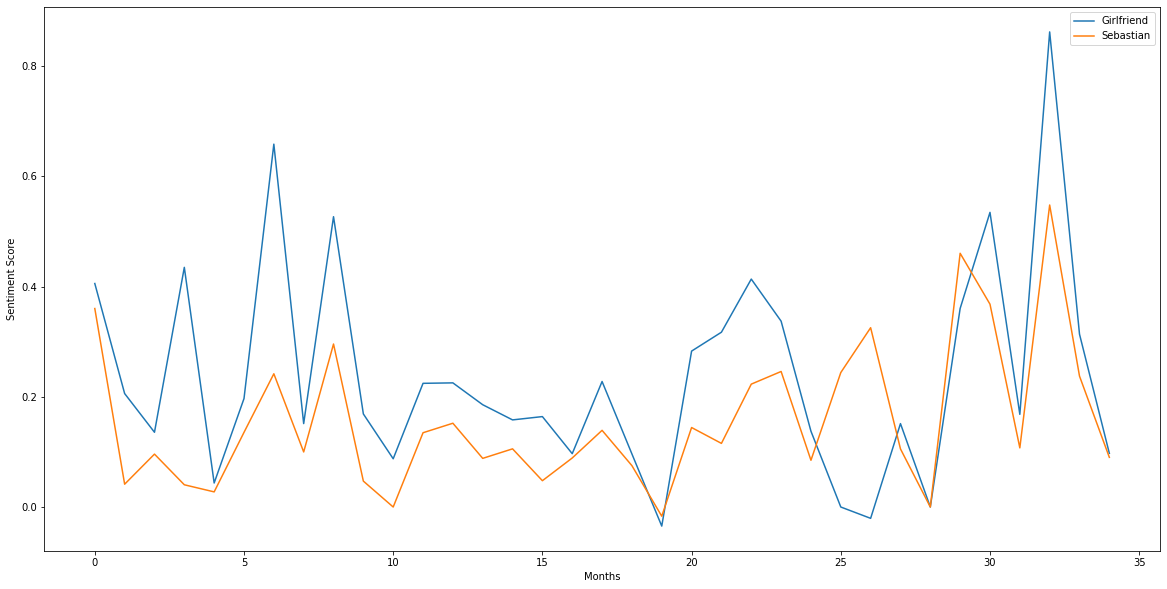

In [ ]:
# Build plot
plt.figure(figsize = (20,10))
plt.plot(lena,label='Girlfriend')
plt.plot(sebastian,label='Sebastian')
plt.xlabel("Months")
plt.ylabel("Sentiment Score")
plt.legend()

# PrePros

## Load in all the JSON files / Facebook Messages

In [ ]:
# Prep Drive For Loading Files
from google.colab import drive
drive.mount('/content/drive/MyDrive/NLProc Exam/')

In [ ]:
# Assemble DataFrame from all the JSONs  leveraging the chatistics Package
## First we install the requiired packages
!pip install pyyaml==5.2
!pip install tqdm==4.40.2
!pip install pandas==0.25.3
!pip install python=3.6
!pip install langdetect==1.0.7
!pip install pip==19.3.1
!pip install seaborn==0.9.0
!pip install wordcloud==1.6.0
!pip install telethon==1.10.9

# Aseemble dataframe
#Clone the Chatistics Github with function for JSONs to DATAFRAME and automatic Language Detection
! git clone https://github.com/MasterScrat/Chatistics
# Once the archive is ready, we move our JSON messages folder into ./raw_data/messenger/
# Then we parse the Facebook Messenger Data
!python parse.py messenger
# Write data to csv - Load in again under 'DK Setup'
!python export.py -f {csv}
# Guide for Git Repos and Colab: https://medium.com/@ashwindesilva/how-to-use-google-colaboratory-to-clone-a-github-repository-e07cf8d3d22b
#Info: Chatistic leverages the https://pypi.org/project/langdetect/ package when deciding whether a message is English  or Danish

## Setup prepreprocessing part

In [ ]:
# Prep Drive
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
#Install Packages
!pip install pyphen
!pip install pycountry
!pip install textdescriptives
!pip install stanza
# Load Danish modoel - If problems look here : https://github.com/explosion/spaCy/issues/4577
!pip3 install spacy
!pip3 install https://github.com/explosion/spacy-models/releases/download//da_core_news_sm-3.0.0a0/da_core_news_sm-3.0.0a0.tar.gz # https://github.com/explosion/spacy-models/releases/tag/da_core_news_sm-3.0.0a0
# Initialize 'da' model, keeping only tagger component (for efficiency)
!python -m spacy download da_core_news_sm

In [ ]:
# Load packages used in the Preprocessing part
import re
import numpy as np
import pandas as pd
from pprint import pprint
from nltk.tokenize.casual import TweetTokenizer
import pyphen
import pycountry
import textdescriptives
import stanza
stanza.download('da')
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Load Spacy
import spacy
import da_core_news_sm
nlp = spacy.load('da_core_news_sm', disable=['parser', 'ner']) # https://spacy.io/models/da

## DK Setup

#### Load & Preprocess

In [ ]:
# Get all of your Facebook JSON's transformed into one CSV
## Using Chatistics
### https://github.com/MasterScrat/Chatistics
## Get a coloumn for Language as well.

#read the data in
df = pd.read_csv('/content/drive/MyDrive/NLProc Exam/All_Chats CSV.csv')

# Get Dates in the right format
df['date'] = pd.to_datetime(df['timestamp'],unit='s', errors='coerce')

# Group by language
grouped = df.groupby(df.language)
DK = grouped.get_group("da")
EN = grouped.get_group("en")

# PREPROCESSING
#Make a copy of original sentence before preprocessing of text variable
DK['text_pros'] = DK['text']
#Remove artefacts from data
DK['text_pros'] = DK.text_pros.str.replace('[ÌÁ]', '')
#Remove new line
DK['text_pros'] = DK.text_pros.str.replace('[\n]', ' ')
#Remove punctuation (not ! )
DK['text_pros'] = DK.text_pros.str.replace('[\.\[\]\,\)\(\'\^\"\?\=\;\:\_\-\´\“\|\*\@\#\&\$\"\/\%\+]', '')
#Remove URLs
DK['text_pros'] = DK['text_pros'].str.replace('http\S+|www.\S+', '', case=False)
#remove whitespace
DK['text_pros'] = DK.text_pros.str.strip()
#Everything is made lowercase further down to allow for the TextDescriptives function to run 


In [ ]:
# Reset Index to account for dropped rows
DK.reset_index(inplace = True, drop = True) 
DK.sample(10)

In [ ]:
# Print some stats
print (DK.date.min())
print (DK.date.max())
DK['conversationWithName'].nunique()

#### Descriptives

In [ ]:
# Test of Textdescriptives package 
da_test = ['Hej med dig min gode mand',
            'Sebastian Elsker kaffe.']

textdescriptives.basic_stats(da_test, lang = 'da', metrics = 'all')

In [ ]:
DK.head()

In [ ]:
# Make the 'text_pros' coloumn a list
DK_Text = DK.text_pros.tolist()

In [ ]:
# Run Textdescriptives function
DK_Text_1 = textdescriptives.basic_stats(DK_Text, lang = 'da', metrics = 'all')
# Clue to if it goes wrong:
## https://www.kaggle.com/c/text-normalization-challenge-english-language/discussion/41528

In [ ]:
DK_Text_1.tail(10)

In [ ]:
# Merge back in
DK.reset_index(drop=True, inplace=True)
DK_Text_1.reset_index(drop=True, inplace=True)
DK_Metrics = pd.merge(DK, DK_Text_1, left_index=True, right_index=True)

In [ ]:
# Check if the match up
DK_Metrics.sample(10)

In [ ]:
# Check amount of messages in Danish
len(DK_Metrics.index)

171599

In [ ]:
# Check amount of messages in English
len(EN.index)

31675

#### Dates
- Resources:
  - https://deallen7.medium.com/managing-date-datetime-and-timestamp-in-python-pandas-cc9d285302ab
  - https://queirozf.com/entries/pandas-dataframe-examples-manipulating-date-and-time#pandas-timestamp-to-string

In [ ]:
# Make functions to get numeric variables for month an year
def get_year(date):
    return date.year 
def get_month(date):
    return date.month

In [ ]:
# Making sure the format is understood correctly
DK_Metrics['month']=DK_Metrics['date'].apply(get_month)
DK_Metrics['year']=DK_Metrics['date'].apply(get_year)
DK_Metrics['weekday'] = DK_Metrics['date'].map(lambda x: x.strftime('%u'))
DK_Metrics['hour'] = DK_Metrics['date'].map(lambda x: x.strftime('%H'))
DK_Metrics['dater'] = DK_Metrics['date'].map(lambda x: x.strftime('%D'))

In [ ]:
#Check
DK_Metrics.sample(10)

#### Last preprocess step
- Made here as to not ruin the 'textdescriptives' functions

In [ ]:
# Now we can make lowercase
DK_Metrics['text_pros'] = DK_Metrics.text_pros.str.lower()

#tokenize - Using Tweet Tokenizer to keep tokens for Emoji analysis
t = TweetTokenizer()
DK_Metrics['text_token'] = DK_Metrics['text_pros'].apply(t.tokenize)


#Tokenize and Lemmatize for the rest of analysis
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp("".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
        ''.join(token.text_with_ws for token in doc)
    return texts_out
# Do tokenization and lemmatization keeping only noun, adj, vb, adv
DK_Metrics['lemma'] = lemmatization(DK_Metrics['text_pros'], allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
#As both Bert and sentida takes whole sentences, the lemmatized tokens are reasembled
from nltk.tokenize.treebank import TreebankWordDetokenizer
def detokenize(text):
    de = TreebankWordDetokenizer().detokenize(text)
    return de
DK_Metrics['lemma'] = DK_Metrics['lemma'].apply(lambda x: detokenize(x))
# Show sample
DK_Metrics.sample(1)

In [ ]:
# dropping meaningless columns 
DK_Metrics.drop(["timestamp","conversationId"], axis = 1, inplace = True) 

In [ ]:
#check
DK_Metrics.sample(1)

In [ ]:
# Push Code To R For Sentida Scoring
# DK_Metrics.to_csv('data_to_r.csv')
# !cp data_to_r.csv "/content/drive/MyDrive/NLProc Exam/"

#### Conclusion on EN Set
Since my danish data is so much larger, I've decided to focus my analysis to only the danish data. Also since it goes the furthest back in time.

# Sentiment Scoring


## Sentida
- Made in R -> see "sentida score.Rmd"

In [ ]:
# Prep Drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Import packafes
import re
import numpy as np
import pandas as pd
# Load data
DK = pd.read_csv('/content/drive/MyDrive/NLProc Exam/ALL_Chats_SentidaTested.csv')

# Deleta potential extra coloumn
DK.drop(DK.columns[0],axis=1,inplace=True)
DK.reset_index(drop=True, inplace=True)

In [ ]:
#Check
DK

In [ ]:
# Check length
len(DK)

### Bert Setup

In [ ]:
# Install transformers and DANLP
!pip install transformers==3.1.0 
!pip install git+https://github.com/alexandrainst/danlp.git 
!pip install gensim==3.8.1

In [ ]:
# Load DaNLP's bert Tone Model
from danlp.models import load_bert_tone_model

In [ ]:
# Tone Model
classifier_tone = load_bert_tone_model()

#### Test Setup

In [ ]:
# Make test Dataframe
Test_DK = DK.head(5)

In [ ]:
#Check
Test_DK

In [ ]:
# try the classifier
classifier_tone.predict('Sebastian er sød')

In [ ]:
# Let's create a helper function that can score each of our messages
def get_scores_tone(text_pros):
    return  classifier_tone.predict(text_pros)

In [ ]:
# Use Classifier on Test Dataframe
Test_DK['sentiment_tone'] = Test_DK['text_pros'].apply(lambda text_pros:get_scores_tone(text_pros))

In [ ]:
# Check
Test_DK.head()

In [ ]:
#  Make Larget Test Set
Test_DK = DK.head(25)

In [ ]:
#Iterate it
test_n = 5  #chunk row size
test_list_df = [Test_DK[i:i+test_n] for i in range(0,Test_DK.shape[0],test_n)]
print(test_list_df)

In [ ]:
# Test function with timer
from tqdm import tqdm
for x in tqdm(range(5)):
  for i in test_list_df:
    i['sentiment_tone'] = i['text_pros'].apply(lambda text_pros:get_scores_tone(text_pros))

In [ ]:
#Check
test_list_df[0].head()

# Validate Sentiment Models On Hand-Tagged Data

## Read In hand tagged and sentida scored data

In [ ]:
# Prep Drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Read In hand tagged and sentida scored data
import re
import numpy as np
import pandas as pd
DK_val = pd.read_csv('/content/drive/MyDrive/NLProc Exam/ReadyForJudging_Hand_TaggedFinal.csv')
# Delete potential extra coloumn
DK_val.drop(DK_val.columns[0],axis=1,inplace=True)
DK_val.reset_index(drop=True, inplace=True)

In [ ]:
#check
DK_val.head()

In [ ]:
# Let's create a helper function that can score each of our messages
def get_scores_tone(lemma):
    return  classifier_tone.predict(lemma)

##  Bert Scoring

In [ ]:
# Calculate Bert Senti Scores
DK_val['sentiment_tone'] = DK_val['lemma'].apply(lambda lemma:get_scores_tone(lemma))

In [ ]:
DK_val.sample(50)

In [ ]:
#Extract polarity scores, dropping analytic scoring
df2 = pd.json_normalize(DK_val['sentiment_tone'])
# Change the column names 
df2.columns =['analytic', 'bert_polarity'] 
df3 =[DK_val, df2]
df3 = pd.concat(df3, axis=1)
df3.drop(['sentiment_tone','analytic'], axis = 1,inplace = True) 
df3.head()

In [ ]:
# Changing value names of bins
df3['bert_polarity'] = df3['bert_polarity'].replace(['positive'],'pos')
df3['bert_polarity'] = df3['bert_polarity'].replace(['neutral'],'neu')
df3['bert_polarity'] = df3['bert_polarity'].replace(['negative'],'neg')

In [ ]:
#Check
sentida_bert = df3
sentida_bert.sample(50)

## plot confusion matrix and classification report

In [ ]:
# Count n of Hand_tagged 
sentida_bert['hand_tagged'].value_counts()

neg    100
pos    100
neu    100
Name: hand_tagged, dtype: int64

In [ ]:
# Import functions from SKlearn to plot confusion matrix and classification report
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, recall_score, f1_score, classification_report
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd

import seaborn as sns
import math

from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib as mpl

mpl.style.use('seaborn')

In [ ]:
#Bert confusion_matrix
y_true = sentida_bert['hand_tagged']
y_pred = sentida_bert['bert_polarity']
matrix_1 = confusion_matrix(y_true, y_pred)

label_names = pd.Series(['negative','neutral','positive'])
pd.DataFrame(matrix_1,
     columns='Predicted ' + label_names,
     index='Is ' + label_names)

,Predicted negative,Predicted neutral,Predicted positive
Is negative,39,46,15
Is neutral,4,71,25
Is positive,2,22,76


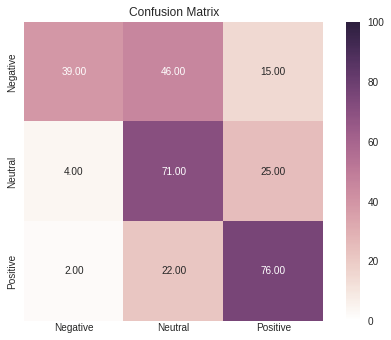

In [ ]:
# PLot as Heatmap
# https://moonbooks.org/Codes/How-to-plot-a-confusion-matrix-with-matplotlib-and-seaborn/
fig = plt.figure()

plt.clf()

ax = fig.add_subplot(111)
ax.set_aspect(1)

cmap = sns.cubehelix_palette(light=1, as_cmap=True)

res = sn.heatmap(matrix_1, annot=True, vmin=0.0, vmax=100.0, fmt='.2f', cmap=cmap)

plt.yticks([0.5,1.5,2.5], [ 'Negative', 'Neutral', 'Positive'],va='center')
plt.xticks([0.5,1.5,2.5], [ 'Negative', 'Neutral', 'Positive'],va='center')

plt.title('Confusion Matrix')

res

In [ ]:
# Print the precision and recall, among other metrics
print(metrics.classification_report(y_true, y_pred, digits=2))

              precision    recall  f1-score   support

         neg       0.87      0.39      0.54       100
         neu       0.51      0.71      0.59       100
         pos       0.66      0.76      0.70       100

    accuracy                           0.62       300
   macro avg       0.68      0.62      0.61       300
weighted avg       0.68      0.62      0.61       300



In [ ]:
#Sentida confusion_matrix
y_true = sentida_bert['hand_tagged']
y_pred = sentida_bert['sentinda_bin']
matrix_2 = confusion_matrix(y_true, y_pred)

label_names = pd.Series(['negative','neutral','positve'])
pd.DataFrame(matrix_2,
     columns='Predicted ' + label_names,
     index='Is ' + label_names)

,Predicted negative,Predicted neutral,Predicted positve
Is negative,60,24,16
Is neutral,14,63,23
Is positve,5,19,76


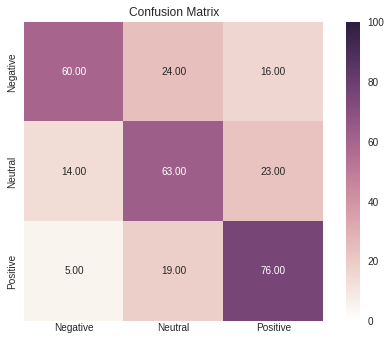

In [ ]:
# Plot as HeatMap
fig = plt.figure()

plt.clf()

ax = fig.add_subplot(111)
ax.set_aspect(1)

cmap = sns.cubehelix_palette(light=1, as_cmap=True)

res = sn.heatmap(matrix_2, annot=True, vmin=0.0, vmax=100.0, fmt='.2f', cmap=cmap)

plt.yticks([0.5,1.5,2.5], [ 'Negative', 'Neutral', 'Positive'],va='center')
plt.xticks([0.5,1.5,2.5], [ 'Negative', 'Neutral', 'Positive'],va='center')

plt.title('Confusion Matrix')

res


In [ ]:
# Print the precision and recall, among other metrics
print(metrics.classification_report(y_true, y_pred, digits=2))

              precision    recall  f1-score   support

         neg       0.76      0.60      0.67       100
         neu       0.59      0.63      0.61       100
         pos       0.66      0.76      0.71       100

    accuracy                           0.66       300
   macro avg       0.67      0.66      0.66       300
weighted avg       0.67      0.66      0.66       300



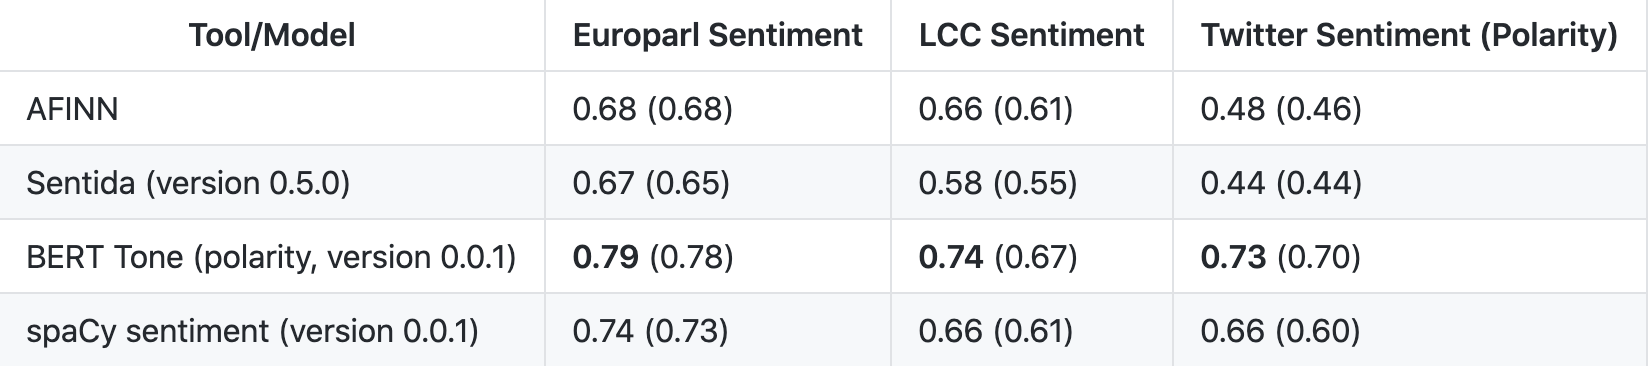

# Super Data Viz & Analysis

## Load Data

In [ ]:
# Prep Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import Data
import re
import numpy as np
import pandas as pd
DK = pd.read_csv('/content/drive/MyDrive/NLProc Exam/ALL_Chats_SentidaTested_bin.csv')
# Deleta potential extra coloumn
DK.drop(DK.columns[0],axis=1,inplace=True)
DK.reset_index(drop=True, inplace=True)
#Make month coloumn numeric for later
DK['month'] =pd.to_numeric(DK['month'])
#Import Original Pre Sentida Score Data For Some Plots (Different Formatting Created An Error)
DK_Metrics= pd.read_csv('/content/drive/MyDrive/NLProc Exam/data_to_r.csv')

In [ ]:
# Check
DK.sample(3)

In [ ]:
#Create Sentida Subsets for different bins
DK_sentida_pos = DK[DK["sentinda_bin"] == 'pos']
DK_sentida_neu = DK[DK["sentinda_bin"] == 'neu']
DK_sentida_neg = DK[DK["sentinda_bin"] == 'neg']

#Making a dataframe that is consequently negative and positive
##Dividing sentida score by number of tokens
#Neg
DK_sentida_mega_neg = DK_sentida_neg
DK_sentida_mega_neg['n_tokens']=pd.to_numeric(DK_sentida_mega_neg['n_tokens'])
DK_sentida_mega_neg['sentinda']=pd.to_numeric(DK_sentida_mega_neg['sentinda'])
DK_sentida_mega_neg['neg_mean'] = DK_sentida_mega_neg['sentinda'].div(DK_sentida_mega_neg['n_tokens'], axis=0)
DK_sentida_mega_neg = DK_sentida_mega_neg[DK_sentida_mega_neg['neg_mean'] <= -1]
#pos
DK_sentida_mega_pos = DK_sentida_pos
DK_sentida_mega_pos['n_tokens']=pd.to_numeric(DK_sentida_mega_pos['n_tokens'])
DK_sentida_mega_pos['sentinda']=pd.to_numeric(DK_sentida_mega_pos['sentinda'])
DK_sentida_mega_pos['pos_mean'] = DK_sentida_mega_pos['sentinda'].div(DK_sentida_mega_pos['n_tokens'], axis=0)
DK_sentida_mega_pos = DK_sentida_mega_pos[DK_sentida_mega_pos['pos_mean'] >= 1]

In [ ]:
#Check
DK_sentida_pos.sample(3)

## Setup

In [ ]:
# Install prerequisites
!pip install certifi==2020.6.20
!pip install cycler==0.10.0
!pip install emoji==0.5.4
!pip install kiwisolver==1.2.0
!pip install matplotlib==3.2.2
!pip install numpy==1.19.0
!pip install opencv-python==4.2.0.34
!pip install pandas==0.25.3
!pip install pyparsing==2.4.7
!pip install python-dateutil==2.8.1
!pip install pytz==2020.1
!pip install six==1.15.0

In [ ]:
# Import Plot package and emoji package
import matplotlib.pyplot as plt
import emoji
import time as T
# load Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Colors: https://coolors.co/palettes/trending
GREEN_COLOR = "#cdb4db"
ORANGE_COLOR = "#ffc8dd"
BLUE_COLOR = "#ffafcc"
YELLOW_COLOR = "#bde0fe"

# Custom Barplot function
def plot_bar(x, y, title,max_limit=0):
    f = plt.figure(figsize=(10, 6))
    if max_limit > 0:
        x = x[0:max_limit]
        y = y[0:max_limit]

    barlist = plt.bar(x=x, height=y, color=GREEN_COLOR)
    plt.title(title, fontdict={"fontsize": 20})
    barlist[np.argmax(np.array(y))].set_color(ORANGE_COLOR)
    for bar in barlist:
        yval = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2.0,
            1.01 * yval,
            np.round(yval, 1),
            ha="center",
            va="bottom",
        )
    plt.xticks(rotation=20)
    footer_text = "Seb"
    plt.figtext(0.25, 0.98, footer_text)

# Custom Lineplot function
def plot_line(x, y, title, max_limit=0):
    f = plt.figure(figsize=(8, 5))
    if max_limit > 0:
        x = x[0:max_limit]
        y = y[0:max_limit]
    barlist = plt.plot(x, y, color=GREEN_COLOR)
    plt.title(title, fontdict={"fontsize": 20})



# Prep variables
time = np.zeros(24)
count = np.zeros(24)
c = np.zeros(24)
# Create custom function for Time Of Day Plots
def plot_time_circle(time, count, title):
    f = plt.figure(figsize=(7, 7))
    ax = plt.subplot(111, projection="polar")
    x = np.arange(0, 2 * np.pi, 2 * np.pi / len(count)) + np.pi / len(count)
    max_ind = np.argmax(count)
    bars = ax.bar(
        x,
        count,
        width=2 * np.pi / len(count),
        alpha=1,
        color=GREEN_COLOR,
        # label="Time Zone: EST",
        bottom=0,
    )
    max_height = 0
    for rect in bars:
        if rect.get_height() > max_height:
            max_height = rect.get_height()
    for rect in bars:
        height = rect.get_height()
        plt.text(
            rect.get_x() + rect.get_width() / 2.0,
            0.8 * max_height,
            "%d" % int(height),
            ha="center",
            va="bottom",
        )

    ax.bar(
        x[max_ind],
        count[max_ind],
        bottom=0,
        width=2 * np.pi / len(count),
        alpha=1,
        color=ORANGE_COLOR,
    )
    ax.bar(
        x,
        np.max(count) * np.ones(len(count)),
        width=2 * np.pi / len(count),
        alpha=0.1,
        bottom=0,
        color=YELLOW_COLOR,
        edgecolor="black",
    )

    # Make the labels go clockwise
    ax.set_theta_direction(-1)
    ax.grid(False)
    ax.spines["polar"].set_visible(False)
    # # Place Zero at Top
    ax.set_theta_offset(np.pi / 2)
    # # Set the circumference ticks
    ax.set_xticks(np.linspace(0, 2 * np.pi, 24, endpoint=False))
    # set the label names
    ticks = [
        "12 AM",
        "1 AM",
        "2 AM",
        "3 AM",
        "4 AM",
        "5 AM",
        "6 AM",
        "7 AM",
        "8 AM",
        "9 AM",
        "10 AM",
        "11 AM",
        "12 PM",
        "1 PM",
        "2 PM",
        "3 PM",
        "4 PM",
        "5 PM",
        "6 PM",
        "7 PM",
        "8 PM",
        "9 PM",
        "10 PM",
        "11 PM",
    ]
    ax.set_xticklabels(ticks)
    plt.setp(ax.get_yticklabels(), visible=False)
    plt.title(title, fontdict={"fontsize": 20})

## Messages Per Contact

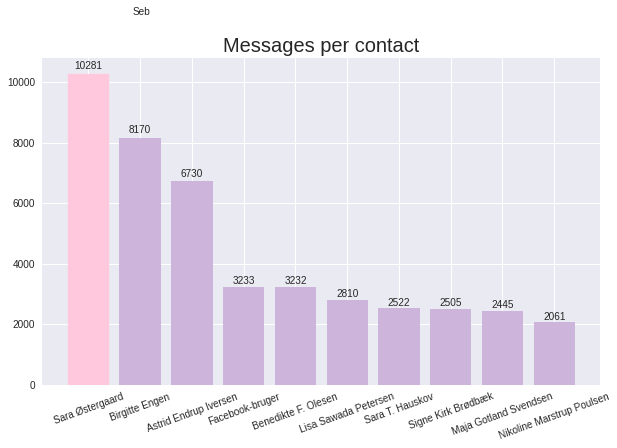

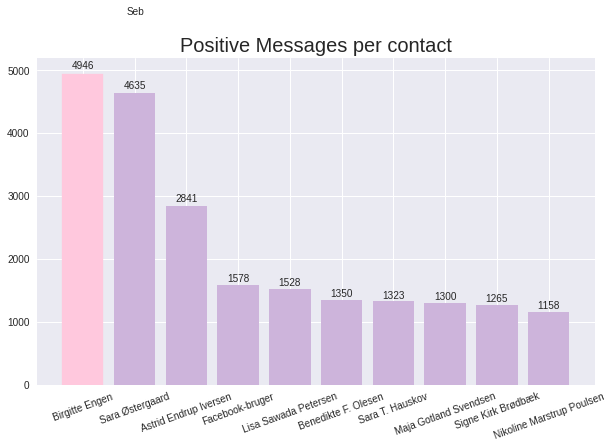

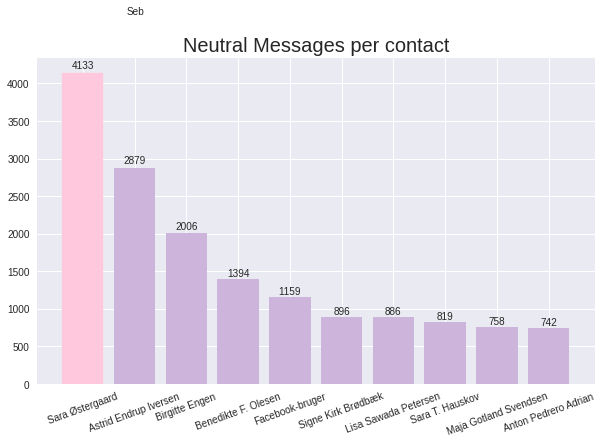

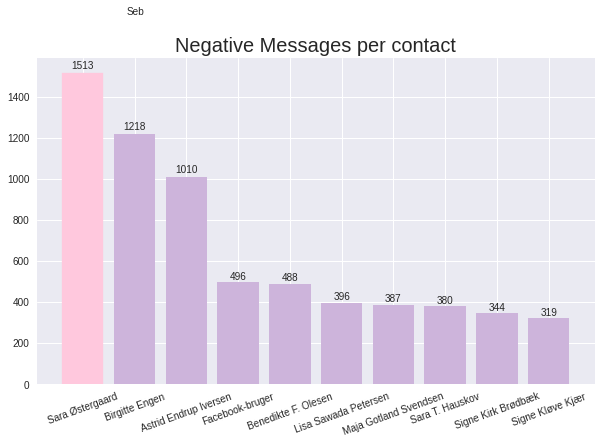

In [ ]:
grouped = DK.groupby("conversationWithName", as_index=False)["hour"]
df_ = grouped.count()
df_.columns = ["conversationWithName", "Count"]
df_.sort_values(by=["Count"], inplace=True, ascending=False)
plot_bar(
            x=df_["conversationWithName"],
            y=df_["Count"],
            title="Messages per contact",
            max_limit=10)
plt.show()

grouped = DK_sentida_pos.groupby("conversationWithName", as_index=False)["hour"]
df_ = grouped.count()
df_.columns = ["conversationWithName", "Count"]
df_.sort_values(by=["Count"], inplace=True, ascending=False)
plot_bar(
            x=df_["conversationWithName"],
            y=df_["Count"],
            title="Positive Messages per contact",
            max_limit=10)
plt.show()

grouped = DK_sentida_neu.groupby("conversationWithName", as_index=False)["hour"]
df_ = grouped.count()
df_.columns = ["conversationWithName", "Count"]
df_.sort_values(by=["Count"], inplace=True, ascending=False)
plot_bar(
            x=df_["conversationWithName"],
            y=df_["Count"],
            title="Neutral Messages per contact",
            max_limit=10)
plt.show()

grouped = DK_sentida_neg.groupby("conversationWithName", as_index=False)["hour"]
df_ = grouped.count()
df_.columns = ["conversationWithName", "Count"]
df_.sort_values(by=["Count"], inplace=True, ascending=False)
plot_bar(
            x=df_["conversationWithName"],
            y=df_["Count"],
            title="Negative Messages per contact",
            max_limit=10)
plt.show()

##### Funny note
- I have the most negative messages with my X, but not the most positive
- That would be with my mom - Holds my heart when life gets tough

In [ ]:
# Subset for me and X
XXX_Seb = DK_sentida_neg[DK_sentida_neg["conversationWithName"] == "XXX"]

In [ ]:
# Custom Barplot function for X and Me
def XXX_plot_bar(x, y, title,max_limit=0):
    f = plt.figure(figsize=(10, 6))
    if max_limit > 0:
        x = x[0:max_limit]
        y = y[0:max_limit]

    barlist = plt.bar(x=x, height=y, color=GREEN_COLOR)
    plt.title(title, fontdict={"fontsize": 20})
    barlist[np.argmax(np.array(y))].set_color(ORANGE_COLOR)
    for bar in barlist:
        yval = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2.0,
            1.01 * yval,
            np.round(yval, 1),
            ha="center",
            va="bottom",
        )
    plt.xticks(rotation=20)
    footer_text = "Seb"
    plt.figtext(0.25, 0.98, footer_text)
    labels = ['Seb', 'XXX', 37337]
    plt.xticks(x, labels, rotation='vertical')

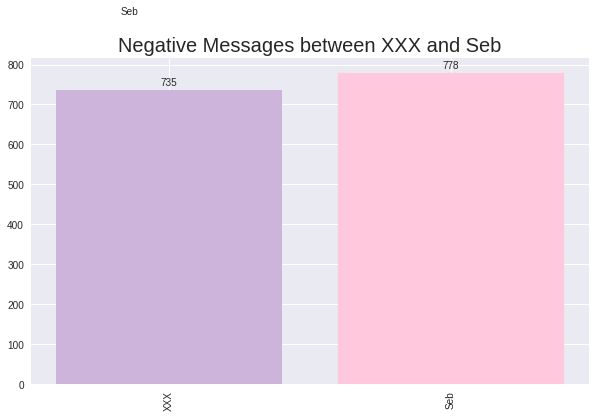

In [ ]:
grouped = XXX_Seb.groupby("outgoing", as_index=False)["hour"]
df_ = grouped.count()
df_.columns = ["outgoing", "Count"]
df_.sort_values(by=["Count"], inplace=True, ascending=False)
XXX_plot_bar(
            x=df_["outgoing"],
            y=df_["Count"],
            title="Negative Messages between XXX and Seb",
            max_limit=10)
plt.show()


## Heatmap

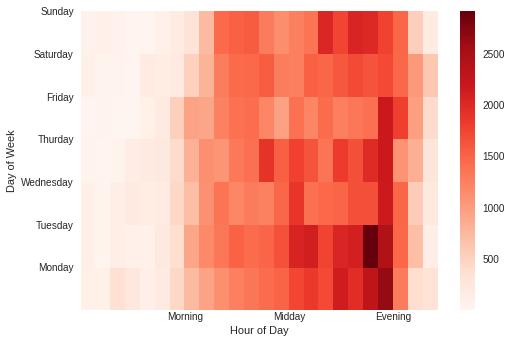

In [ ]:
# Create new Dataframe containing data counts
heatmap_data = DK.groupby(['weekday', 'hour']).size()
heatmap_data = heatmap_data.unstack()

# Create heatmap over number of messages across days and hours of week
plt.pcolor(heatmap_data, cmap='Reds')
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.colorbar()
plt.yticks([1,2,3,4,5,6,7], [ 'Monday', 'Tuesday', 'Wednesday','Thurday','Friday','Saturday','Sunday'])
plt.xticks([7,14,21], [ 'Morning', 'Midday', 'Evening'],va='center')
plt.show()

## My sentiment across time


([<matplotlib.axis.YTick at 0x7f9679c53a20>,
 [Text(0, 0, '-1'),
  Text(0, 0, '0'),
  Text(0, 0, '1'),
  Text(0, 0, '2'),
  Text(0, 0, '3'),
  Text(0, 0, '4'),
  Text(0, 0, '5'),
  Text(0, 0, '6'),
  Text(0, 0, '7'),
  Text(0, 0, '8')])

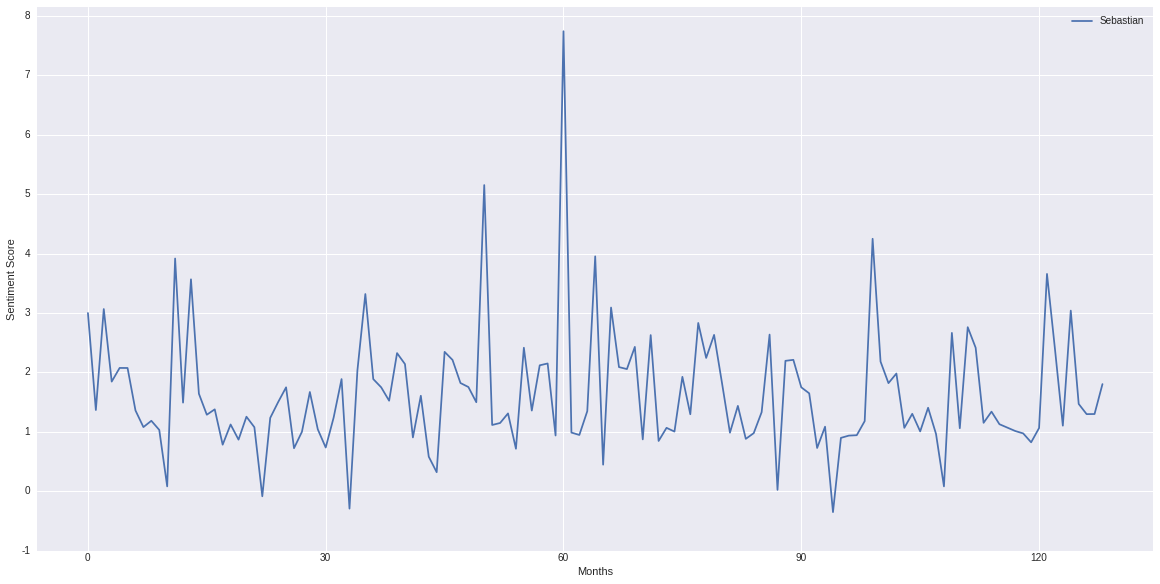

In [ ]:
# Plot line for my sentiment across time
Sebastian = DK[DK["outgoing"] == True]
Sebastian
year_month = Sebastian.groupby(['month','year']).mean().reset_index()
Sebastian = year_month['sentinda'].values
plt.figure(figsize = (20,10))
plt.plot(Sebastian,label='Sebastian')
plt.xlabel("Months")
plt.ylabel("Sentiment Score")
plt.legend()
plt.xticks([0,30,60,90,120], [0,30,60,90,120],va='center')
plt.yticks([-1,0,1,2,3,4,5,6,7,8], [-1,0,1,2,3,4,5,6,7,8],va='center')

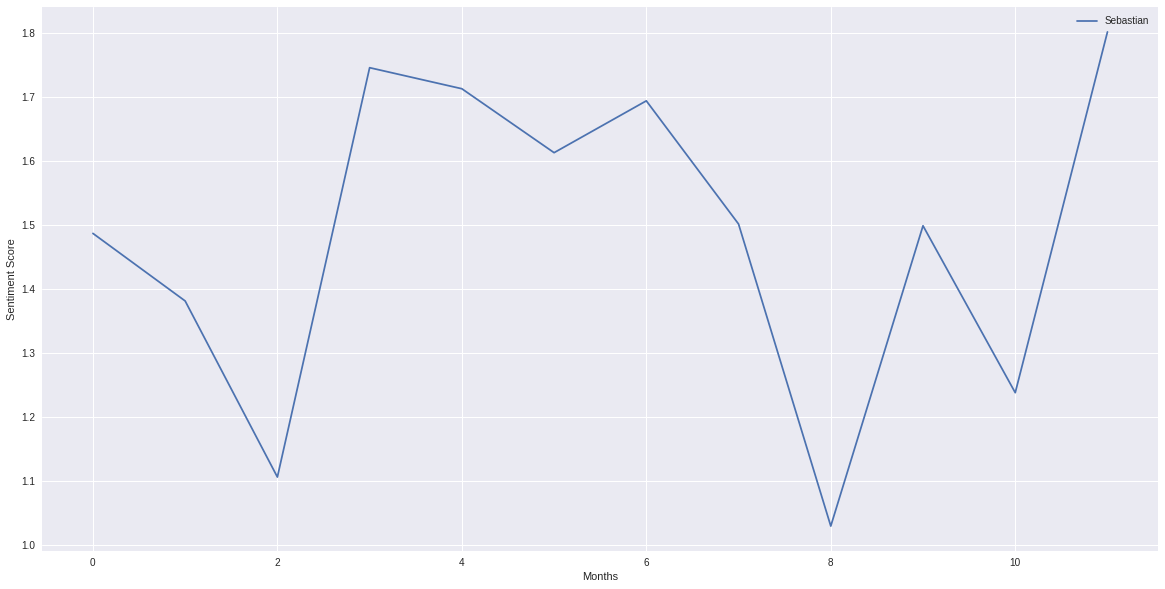

In [ ]:
# Plot a line for average sentiment across months of a year
Sebastian = DK[DK["outgoing"] == True]
Sebastian
year_month = Sebastian.groupby(['month']).mean().reset_index()
Sebastian = year_month['sentinda'].values
plt.figure(figsize = (20,10))
plt.plot(Sebastian,label='Sebastian')
plt.xlabel("Months")
plt.ylabel("Sentiment Score")
plt.legend()


## WordUse

In [ ]:
# Pool per author
df=DK
nan_value = float("NaN")
df.replace("", nan_value, inplace=True)
df.dropna(subset = ["hour"], inplace=True)
df.reset_index(drop=True, inplace=True)
df['text'] = df[['conversationWithName','text_pros','outgoing']].groupby(['conversationWithName','outgoing'])['text_pros'].transform(lambda x: ','.join(map(str, x)))
df = df.drop_duplicates(subset = ['text','conversationWithName','outgoing'], keep = 'last')

In [ ]:
# Reset Index and count number of rows
df.reset_index(drop=True, inplace=True)
len(df)

2356

In [ ]:
#convert text tokens in dataframe to list
df_top_list = df.text.to_numpy().tolist()
#function for tokenizing
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

In [ ]:
data_words = list(sent_to_words(df_top_list))

In [ ]:
# Count Frequencies
from collections import Counter
words = Counter(x for xs in data_words for x in set(xs))
# Help: https://www.kite.com/python/answers/how-to-count-the-frequency-of-words-in-a-list-in-python

(-0.5, 399.5, 199.5, -0.5)

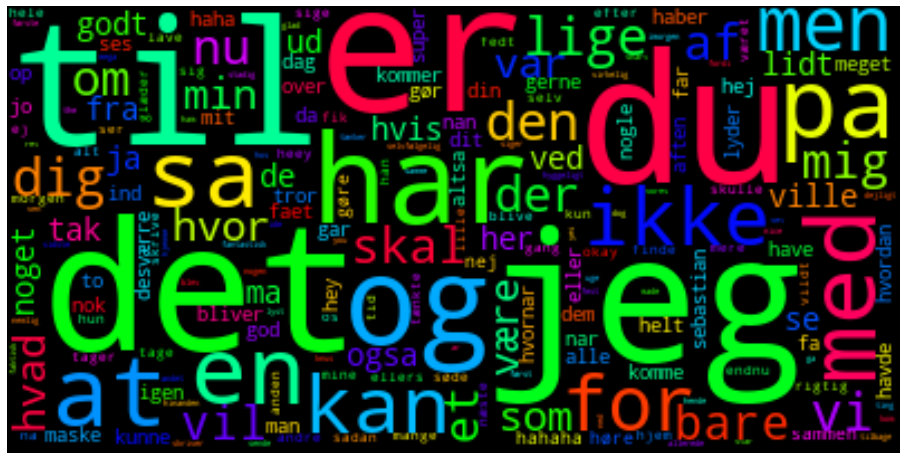

In [ ]:
# Use wordcloud to plot most frequent words
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
cloud = WordCloud(max_font_size=80,colormap="hsv").generate_from_frequencies(words)
plt.figure(figsize=(16,12))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')

In [ ]:
# Make Freuency table
df_ = pd.DataFrame.from_dict(words, orient='index')
df_['Freq'] = df_[0]
df_['word'] = df_.index
df_.sort_values(by=["Freq"], inplace=True, ascending=False)

In [ ]:
# Show
df_

,0,Freq,word
jeg,1907,1907,jeg
er,1884,1884,er
du,1865,1865,du
det,1863,1863,det
til,1787,1787,til
...,...,...,...
vægopslag,1,1,vægopslag
nomnomnomnomnom,1,1,nomnomnomnomnom
mysisk,1,1,mysisk
caaamp,1,1,caaamp


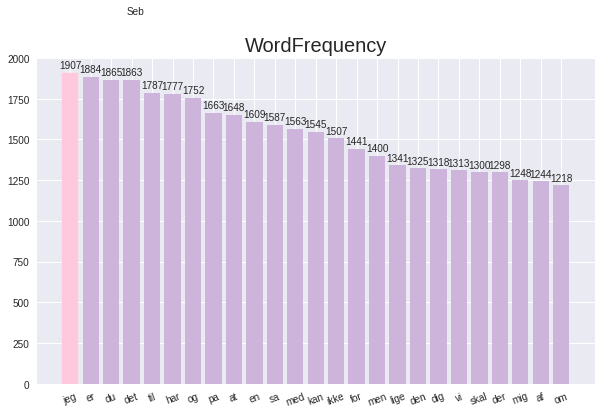

In [ ]:
# Make bar plot of most frequent words
plot_bar(
        x=df_["word"],
        y=df_["Freq"],
        title="WordFrequency",
        max_limit=25)

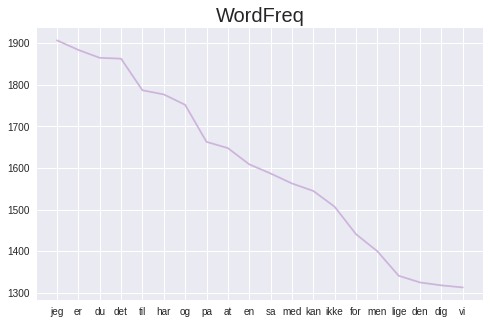

In [ ]:
# make lineplot of most frequent words
df_ = pd.DataFrame.from_dict(words, orient='index')
df_['Freq'] = df_[0]
df_['word'] = df_.index
df_.sort_values(by=["Freq"], inplace=True, ascending=False)
plot_line(x=df_["word"], y=df_["Freq"], title="WordFreq",max_limit=20)
plt.show()

### WordUse for Sebastian

In [ ]:
# Pool per author - keep only outgoing messages
df=DK
nan_value = float("NaN")
df.replace("", nan_value, inplace=True)
df.dropna(subset = ["hour"], inplace=True)
df.reset_index(drop=True, inplace=True)
df['text'] = df[['conversationWithName','text_pros','outgoing']].groupby(['conversationWithName','outgoing'])['text_pros'].transform(lambda x: ','.join(map(str, x)))
df = df.drop_duplicates(subset = ['text','conversationWithName','outgoing'], keep = 'last')
df = df[((df["outgoing"] == False))]

In [ ]:
# Reset index and count row number
df.reset_index(drop=True, inplace=True)
len(df)

1158

In [ ]:
#convert text tokens in dataframe to list
df_top_list = df.text.to_numpy().tolist()
#function for tokenizing
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

In [ ]:
data_words = list(sent_to_words(df_top_list))

In [ ]:
from collections import Counter
words = Counter(x for xs in data_words for x in set(xs))
# Help: https://www.kite.com/python/answers/how-to-count-the-frequency-of-words-in-a-list-in-python

(-0.5, 399.5, 199.5, -0.5)

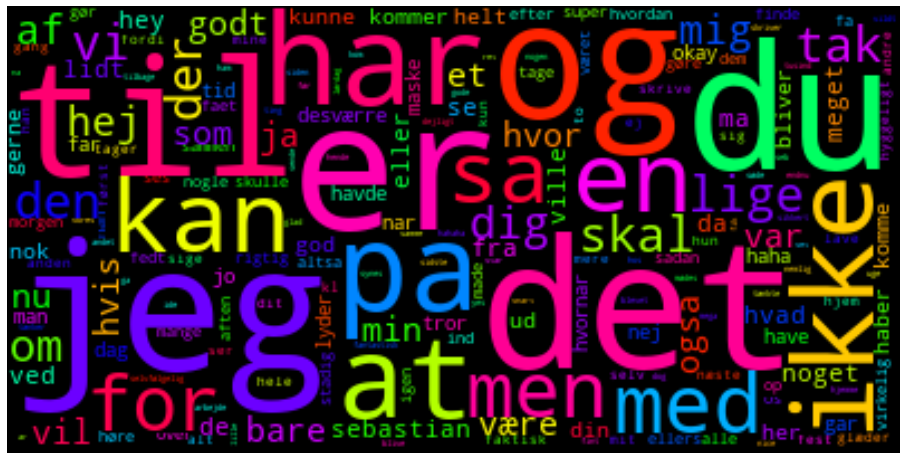

In [ ]:
# Use wordcloud to plot most frequent words
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
cloud = WordCloud(max_font_size=80,colormap="hsv").generate_from_frequencies(words)
plt.figure(figsize=(16,12))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')

In [ ]:
# Make table
df_ = pd.DataFrame.from_dict(words, orient='index')
df_['Freq'] = df_[0]
df_['word'] = df_.index
df_.sort_values(by=["Freq"], inplace=True, ascending=False)

In [ ]:
df_

,0,Freq,word
er,937,937,er
det,932,932,det
jeg,919,919,jeg
du,906,906,du
og,884,884,og
...,...,...,...
terapeutisk,1,1,terapeutisk
riiiigtigt,1,1,riiiigtigt
tournament,1,1,tournament
pressede,1,1,pressede


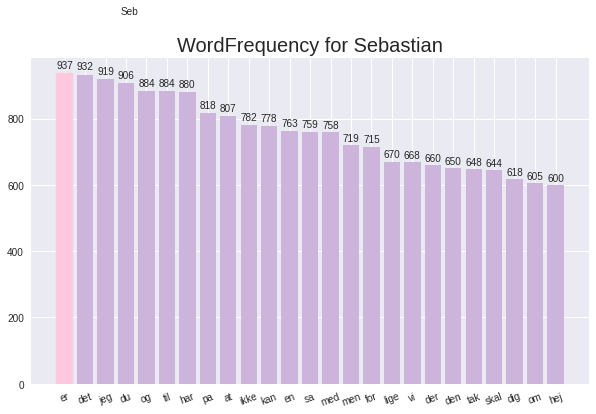

In [ ]:
# Make bar plot of my most frequent words
plot_bar(
        x=df_["word"],
        y=df_["Freq"],
        title="WordFrequency for Sebastian",
        max_limit=25)

### WordUse for Sebastian in Negative Messages

In [ ]:
# Pool per author - keep only outgoing messages
# Keep only negative scored messages
df=DK_sentida_neg
nan_value = float("NaN")
df.replace("", nan_value, inplace=True)
df.dropna(subset = ["hour"], inplace=True)
df.reset_index(drop=True, inplace=True)
df['text'] = df[['conversationWithName','text_pros','outgoing']].groupby(['conversationWithName','outgoing'])['text_pros'].transform(lambda x: ','.join(map(str, x)))
df = df.drop_duplicates(subset = ['text','conversationWithName','outgoing'], keep = 'last')
df = df[((df["outgoing"] == False))]

In [ ]:
# Reset index and count row lenght
df.reset_index(drop=True, inplace=True)
len(df)

767

In [ ]:
#convert text tokens in dataframe to list
df_top_list = df.text.to_numpy().tolist()
#function for tokenizing
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

In [ ]:
data_words = list(sent_to_words(df_top_list))

In [ ]:
# Help: https://www.kite.com/python/answers/how-to-count-the-frequency-of-words-in-a-list-in-python
from collections import Counter
words = Counter(x for xs in data_words for x in set(xs))

(-0.5, 399.5, 199.5, -0.5)

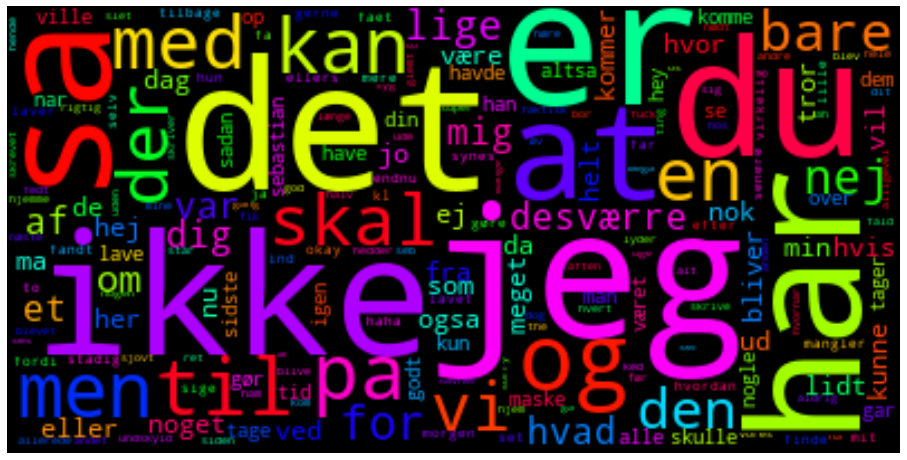

In [ ]:
#Make WordCLoud of  Frequent words
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
cloud = WordCloud(max_font_size=80,colormap="hsv").generate_from_frequencies(words)
plt.figure(figsize=(16,12))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')

In [ ]:
#Convert Dictionary to Dataframe
df_ = pd.DataFrame.from_dict(words, orient='index')
df_['Freq'] = df_[0]
df_['word'] = df_.index
df_.sort_values(by=["Freq"], inplace=True, ascending=False)

In [ ]:
#Show Frequency Dataframe
df_

,0,Freq,word
jeg,564,564,jeg
det,564,564,det
er,535,535,er
ikke,490,490,ikke
du,470,470,du
...,...,...,...
heavily,1,1,heavily
toxic,1,1,toxic
zuraban,1,1,zuraban
weeks,1,1,weeks


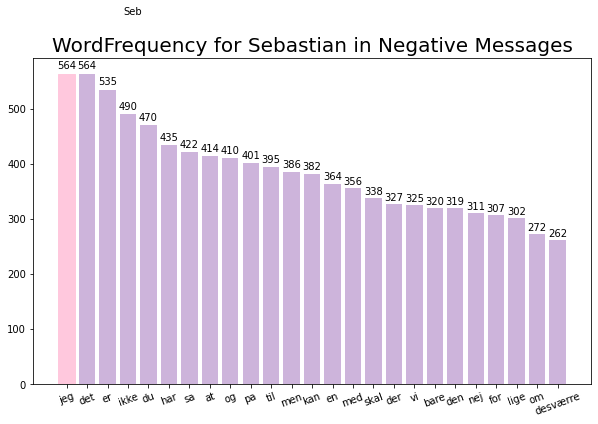

In [ ]:
#Plot using Barfunction
plot_bar(
        x=df_["word"],
        y=df_["Freq"],
        title="WordFrequency for Sebastian in Negative Messages",
        max_limit=25)

## Emoji

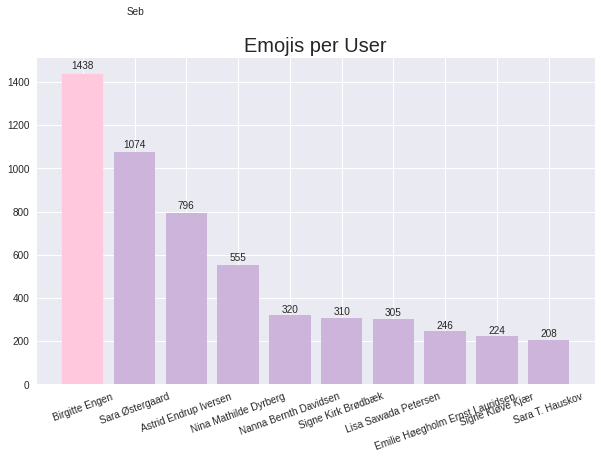

In [ ]:
#Count emojis per user
grouped = DK_Metrics.groupby("conversationWithName", as_index=False)
df_list = []
for name, group in grouped:
    emoji_count = 0
    msgs = group["text"].str.split(" ")
    for m in msgs:
        if any(x in m for x in emoji.UNICODE_EMOJI):
            emoji_count += 1
    df_list.append([name, emoji_count])

df_ = pd.DataFrame(df_list, columns=["conversationWithName", "WordCount"])
df_.sort_values(by=["WordCount"], inplace=True, ascending=False)
plot_bar(
        x=df_["conversationWithName"],
        y=df_["WordCount"],
        title="Emojis per User",
        max_limit=10)

In [ ]:
# Make special version of custom bar plot function with labels for emoji plot
def EMOJI_plot_bar(x, y, title,max_limit=0):
    f = plt.figure(figsize=(10, 6))
    if max_limit > 0:
        x = x[0:max_limit]
        y = y[0:max_limit]

    barlist = plt.bar(x=x, height=y, color=GREEN_COLOR)
    plt.title(title, fontdict={"fontsize": 20})
    barlist[np.argmax(np.array(y))].set_color(ORANGE_COLOR)
    for bar in barlist:
        yval = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2.0,
            1.01 * yval,
            np.round(yval, 1),
            ha="center",
            va="bottom",
        )
    plt.xticks(rotation=20)
    footer_text = "Seb"
    plt.figtext(0.25, 0.98, footer_text)
    labels = ['Seb', 'Friends', 37337]
    plt.xticks(x, labels, rotation='vertical')

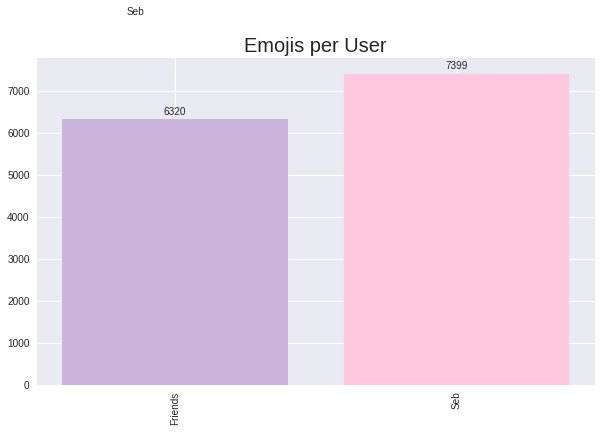

In [ ]:
# PLot Sum of emojis in my outgoing messages vs. ingoing.
grouped = DK_Metrics.groupby("outgoing", as_index=False)
df_list = []
for name, group in grouped:
    emoji_count = 0
    msgs = group["text"].str.split(" ")
    for m in msgs:
        if any(x in m for x in emoji.UNICODE_EMOJI):
            emoji_count += 1
    df_list.append([name, emoji_count])

df_ = pd.DataFrame(df_list, columns=["outgoing", "WordCount"])
df_.sort_values(by=["WordCount"], inplace=True, ascending=False)
EMOJI_plot_bar(
        x=df_["outgoing"],
        y=df_["WordCount"],
        title="Emojis per User",
        max_limit=10)

- I've sent a thousand more emojis than my friends

## Messages Per Year

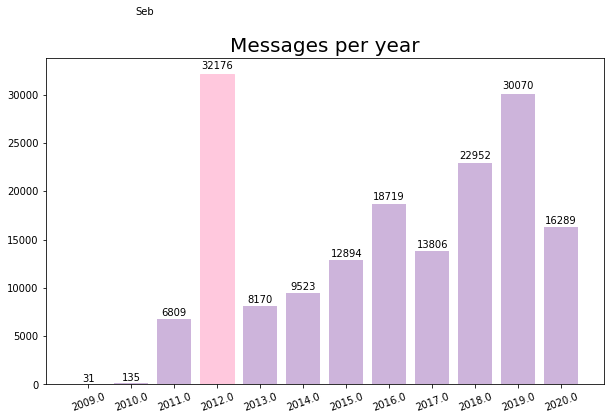

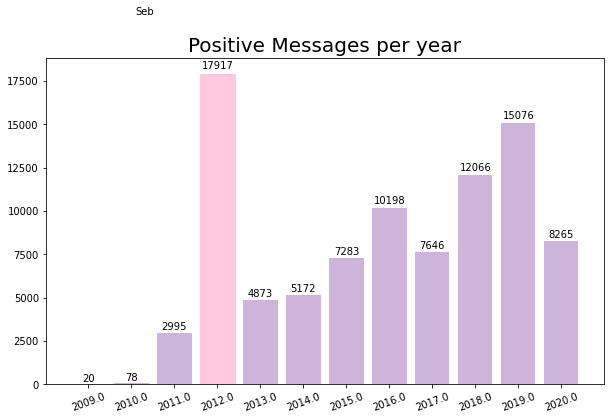

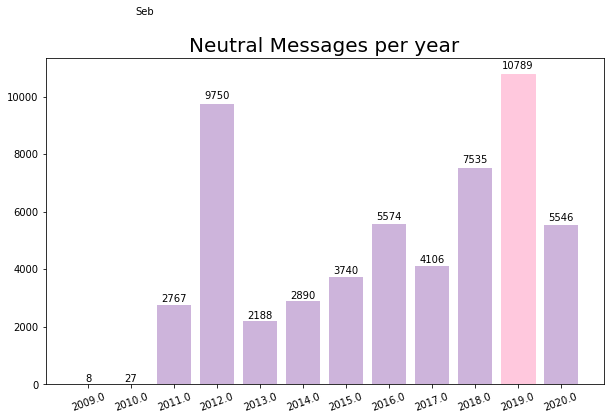

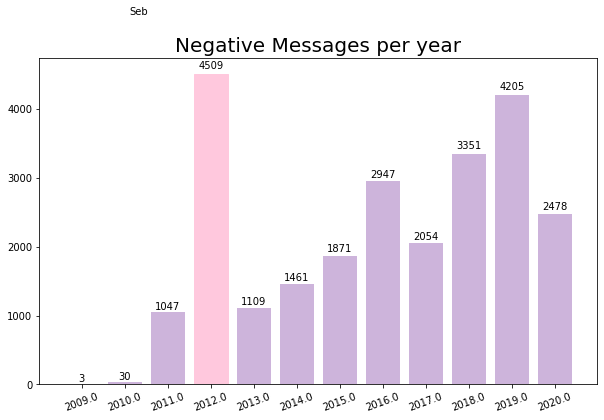

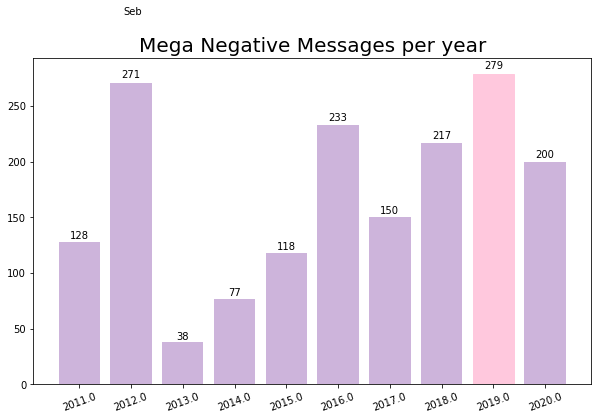

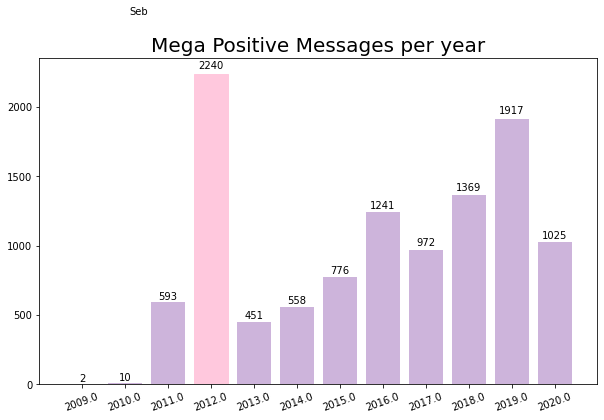

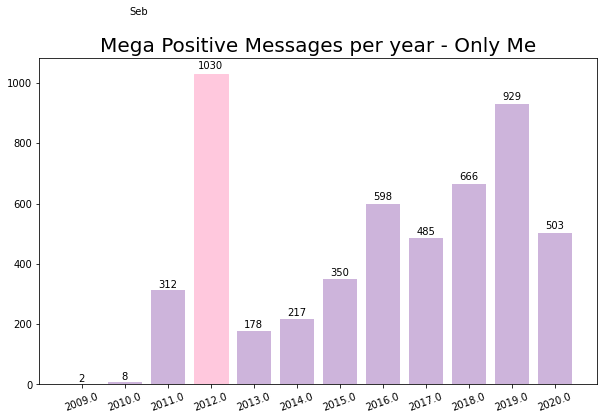

In [ ]:
# Plot messages per year
grouped = DK_Metrics.groupby("year", as_index=False)["conversationWithName"]
df_ = grouped.count()
df_.columns = ["year", "Count"]
#df_.sort_values(by=["Count"], inplace=True, ascending=False)
plot_bar(x=df_["year"].astype(str),
            y=df_["Count"],
            title="Messages per year")
plt.show()

grouped = DK_sentida_pos.groupby("year", as_index=False)["conversationWithName"]
df_ = grouped.count()
df_.columns = ["year", "Count"]
#df_.sort_values(by=["Count"], inplace=True, ascending=False)
plot_bar(x=df_["year"].astype(str),
            y=df_["Count"],
            title="Positive Messages per year")
plt.show()

grouped = DK_sentida_neu.groupby("year", as_index=False)["conversationWithName"]
df_ = grouped.count()
df_.columns = ["year", "Count"]
#df_.sort_values(by=["Count"], inplace=True, ascending=False)
plot_bar(x=df_["year"].astype(str),
            y=df_["Count"],
            title="Neutral Messages per year")
plt.show()

grouped = DK_sentida_neg.groupby("year", as_index=False)["conversationWithName"]
df_ = grouped.count()
df_.columns = ["year", "Count"]
#df_.sort_values(by=["Count"], inplace=True, ascending=False)
plot_bar(x=df_["year"].astype(str),
            y=df_["Count"],
            title="Negative Messages per year")
plt.show()

grouped = DK_sentida_mega_neg.groupby("year", as_index=False)["conversationWithName"]
df_ = grouped.count()
df_.columns = ["year", "Count"]
#df_.sort_values(by=["Count"], inplace=True, ascending=False)
plot_bar(x=df_["year"].astype(str),
            y=df_["Count"],
            title="Mega Negative Messages per year")
plt.show()

grouped = DK_sentida_mega_pos.groupby("year", as_index=False)["conversationWithName"]
df_ = grouped.count()
df_.columns = ["year", "Count"]
#df_.sort_values(by=["Count"], inplace=True, ascending=False)
plot_bar(x=df_["year"].astype(str),
            y=df_["Count"],
            title="Mega Positive Messages per year")
plt.show()

#Extra just for my outgoing messages
DK_sentida_mega_pos_me = DK_sentida_mega_pos[DK_sentida_mega_pos["outgoing"] == True]
grouped = DK_sentida_mega_pos_me.groupby("year", as_index=False)["conversationWithName"]
df_ = grouped.count()
df_.columns = ["year", "Count"]
#df_.sort_values(by=["Count"], inplace=True, ascending=False)
plot_bar(x=df_["year"].astype(str),
            y=df_["Count"],
            title="Mega Positive Messages per year - Only Me")


- First year at boarding school

## Messages Per Month

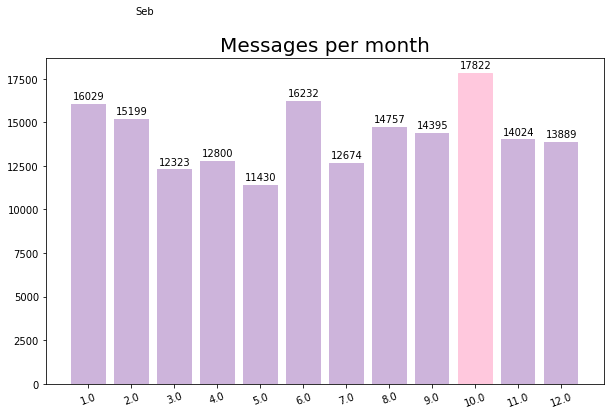

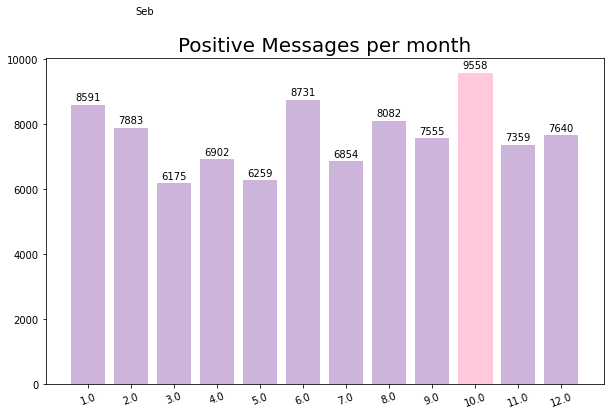

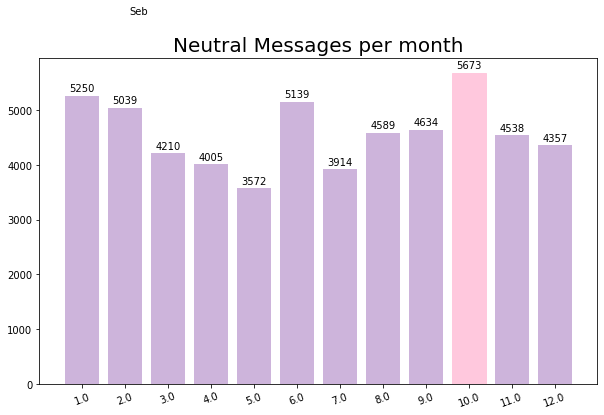

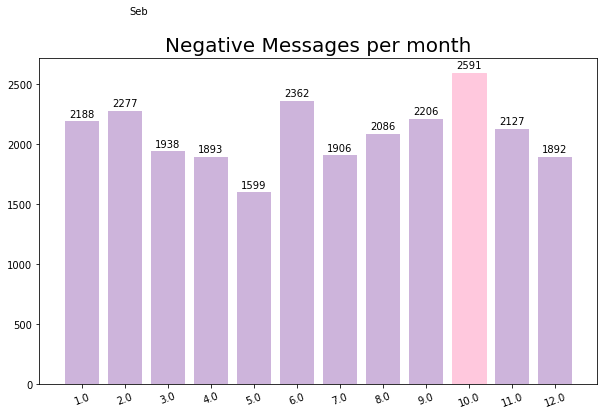

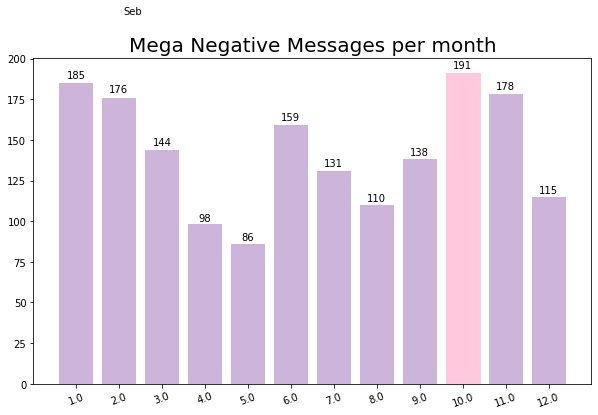

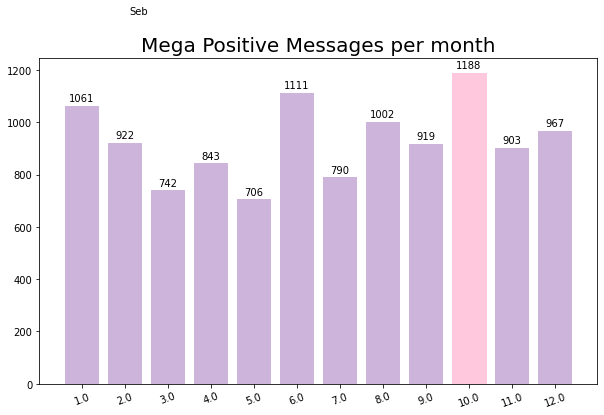

In [ ]:
# Plot messages per month
grouped = DK.groupby("month", as_index=False)["conversationWithName"]
df_ = grouped.count()
df_.columns = ["month", "Count"]
#df_.sort_values(by=["Count"], inplace=True, ascending=False)
plot_bar(x=df_["month"].astype(str),
            y=df_["Count"],
            title="Messages per month")
plt.show()

grouped = DK_sentida_pos.groupby("month", as_index=False)["conversationWithName"]
df_ = grouped.count()
df_.columns = ["month", "Count"]
#df_.sort_values(by=["Count"], inplace=True, ascending=False)
plot_bar(x=df_["month"].astype(str),
            y=df_["Count"],
            title="Positive Messages per month")
plt.show()

grouped = DK_sentida_neu.groupby("month", as_index=False)["conversationWithName"]
df_ = grouped.count()
df_.columns = ["month", "Count"]
#df_.sort_values(by=["Count"], inplace=True, ascending=False)
plot_bar(x=df_["month"].astype(str),
            y=df_["Count"],
            title="Neutral Messages per month")
plt.show()

grouped = DK_sentida_neg.groupby("month", as_index=False)["conversationWithName"]
df_ = grouped.count()
df_.columns = ["month", "Count"]
#df_.sort_values(by=["Count"], inplace=True, ascending=False)
plot_bar(x=df_["month"].astype(str),
            y=df_["Count"],
            title="Negative Messages per month")
plt.show()


grouped = DK_sentida_mega_neg.groupby("month", as_index=False)["conversationWithName"]
df_ = grouped.count()
df_.columns = ["month", "Count"]
#df_.sort_values(by=["Count"], inplace=True, ascending=False)
plot_bar(x=df_["month"].astype(str),
            y=df_["Count"],
            title="Mega Negative Messages per month")
plt.show()

grouped = DK_sentida_mega_pos.groupby("month", as_index=False)["conversationWithName"]
df_ = grouped.count()
df_.columns = ["month", "Count"]
#df_.sort_values(by=["Count"], inplace=True, ascending=False)
plot_bar(x=df_["month"].astype(str),
            y=df_["Count"],
            title="Mega Positive Messages per month")
plt.show()


### Can I find a negativity virus during breakup 
- Keep In Mind that the BreakUp was in an english conversation that has been filtered here

---



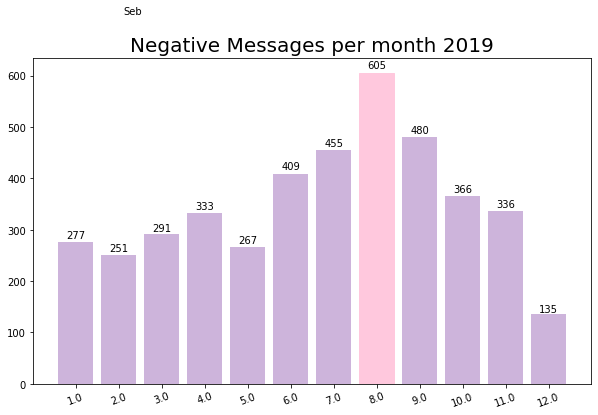

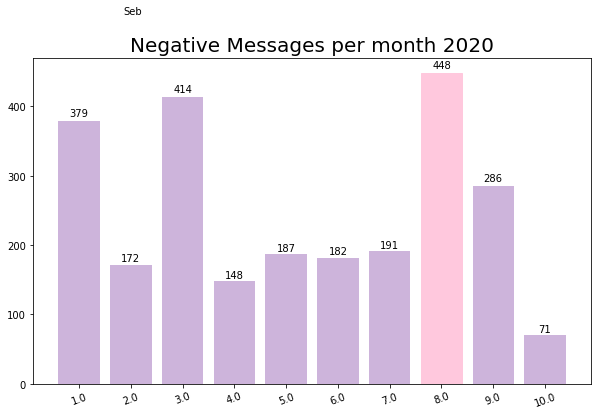

In [ ]:
# Plotting count of 2019 negative messages
DK_sentida_neg_2019 = DK_sentida_neg[DK_sentida_neg['year'] == 2019.0]
grouped = DK_sentida_neg_2019.groupby("month", as_index=False)["conversationWithName"]
df_ = grouped.count()
df_.columns = ["month", "Count"]
#df_.sort_values(by=["Count"], inplace=True, ascending=False)
plot_bar(x=df_["month"].astype(str),
            y=df_["Count"],
            title="Negative Messages per month 2019")
plt.show()

# Plotting count of 2020 negative messages
DK_sentida_neg_2020 = DK_sentida_neg[DK_sentida_neg['year'] == 2020.0]
grouped = DK_sentida_neg_2020.groupby("month", as_index=False)["conversationWithName"]
df_ = grouped.count()
df_.columns = ["month", "Count"]
#df_.sort_values(by=["Count"], inplace=True, ascending=False)
plot_bar(x=df_["month"].astype(str),
            y=df_["Count"],
            title="Negative Messages per month 2020")
plt.show()

- My BreakUp Affected My Other Chats

## Messages Per Weekday

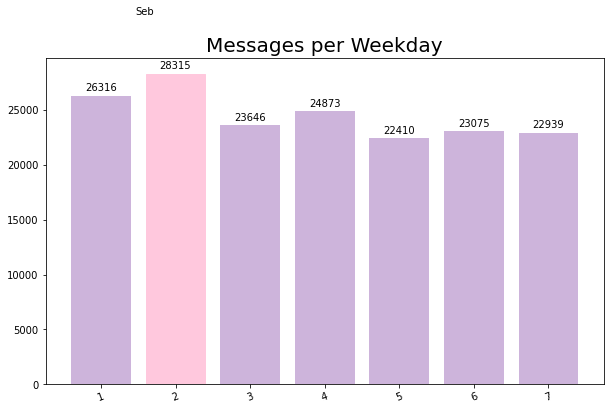

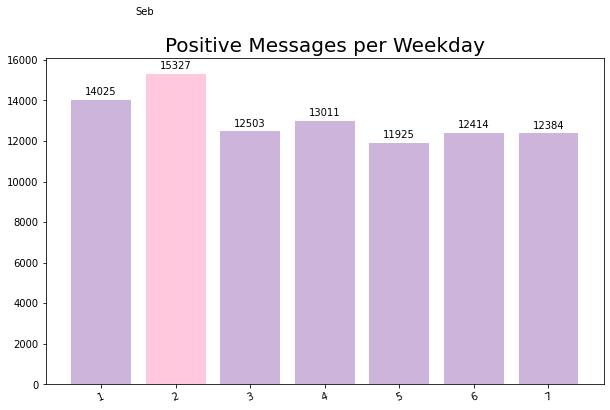

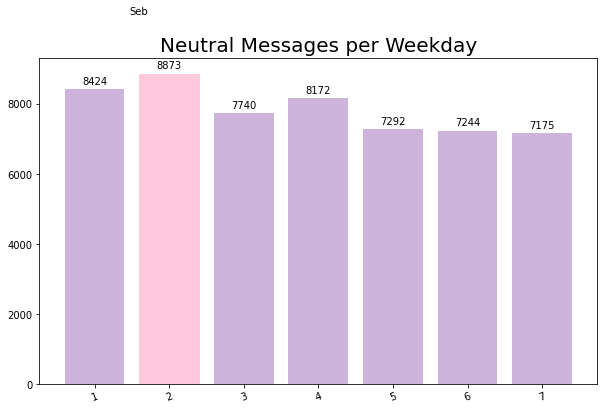

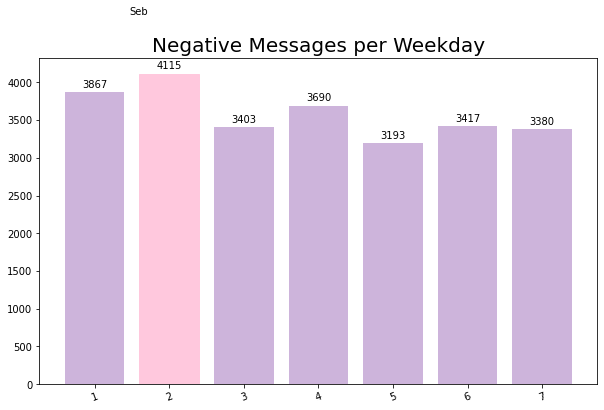

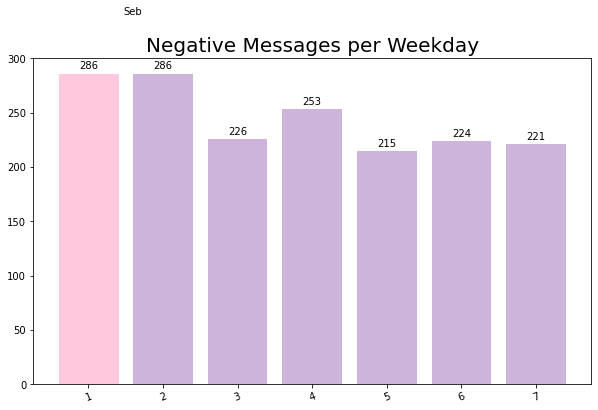

In [ ]:
# Plot messages across a week
grouped = DK.groupby("weekday", as_index=False)["conversationWithName"]
df_ = grouped.count()
df_.columns = ["weekday", "Count"]
#df_.sort_values(by=["Count"], inplace=True, ascending=False)
plot_bar(x=df_["weekday"],
            y=df_["Count"],
            title="Messages per Weekday")
plt.show()

grouped = DK_sentida_pos.groupby("weekday", as_index=False)["conversationWithName"]
df_ = grouped.count()
df_.columns = ["weekday", "Count"]
#df_.sort_values(by=["Count"], inplace=True, ascending=False)
plot_bar(x=df_["weekday"],
            y=df_["Count"],
            title="Positive Messages per Weekday")
plt.show()

grouped = DK_sentida_neu.groupby("weekday", as_index=False)["conversationWithName"]
df_ = grouped.count()
df_.columns = ["weekday", "Count"]
#df_.sort_values(by=["Count"], inplace=True, ascending=False)
plot_bar(x=df_["weekday"],
            y=df_["Count"],
            title="Neutral Messages per Weekday")
plt.show()

grouped = DK_sentida_neg.groupby("weekday", as_index=False)["conversationWithName"]
df_ = grouped.count()
df_.columns = ["weekday", "Count"]
#df_.sort_values(by=["Count"], inplace=True, ascending=False)
plot_bar(x=df_["weekday"],
            y=df_["Count"],
            title="Negative Messages per Weekday")
plt.show()

grouped = DK_sentida_mega_neg.groupby("weekday", as_index=False)["conversationWithName"]
df_ = grouped.count()
df_.columns = ["weekday", "Count"]
#df_.sort_values(by=["Count"], inplace=True, ascending=False)
plot_bar(x=df_["weekday"],
            y=df_["Count"],
            title="Negative Messages per Weekday")
plt.show()

## Time Of Day

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:58: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)


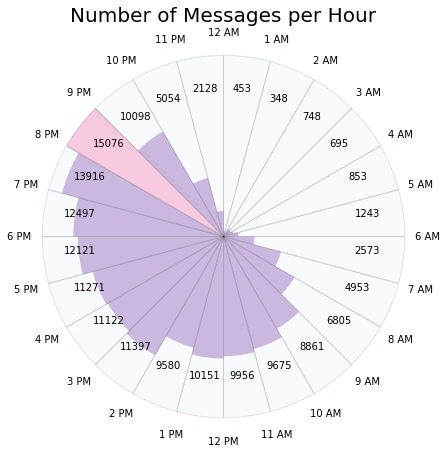

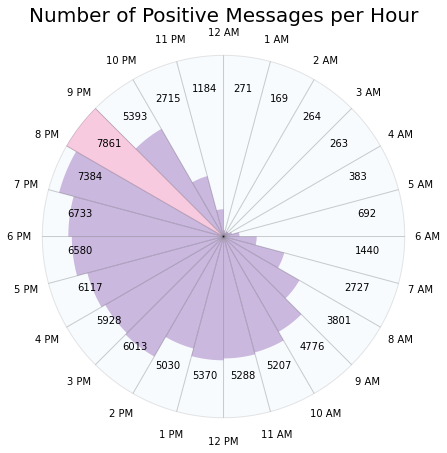

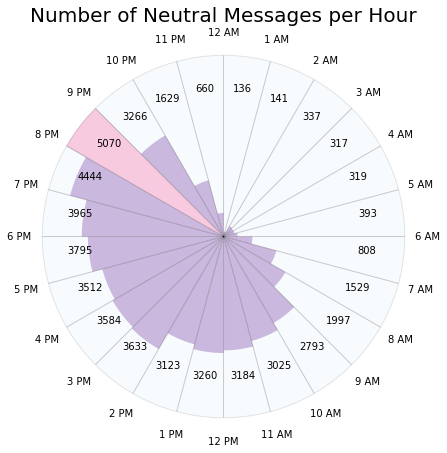

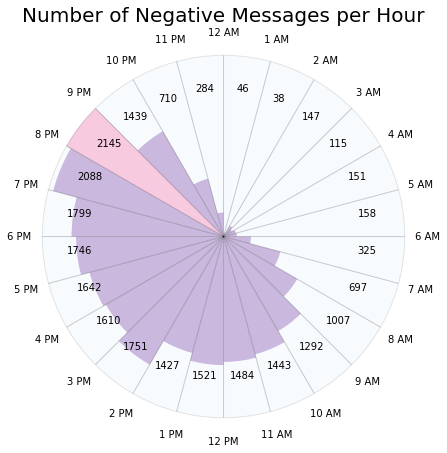

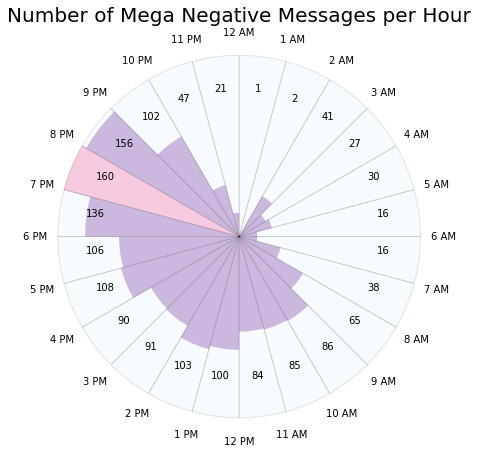

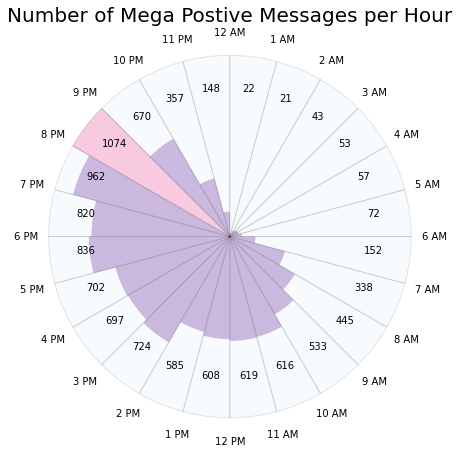

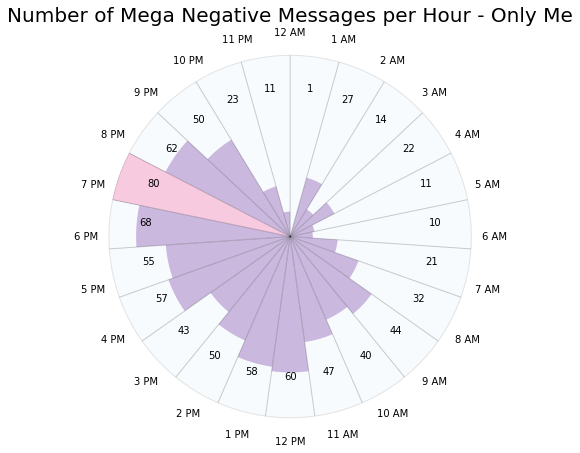

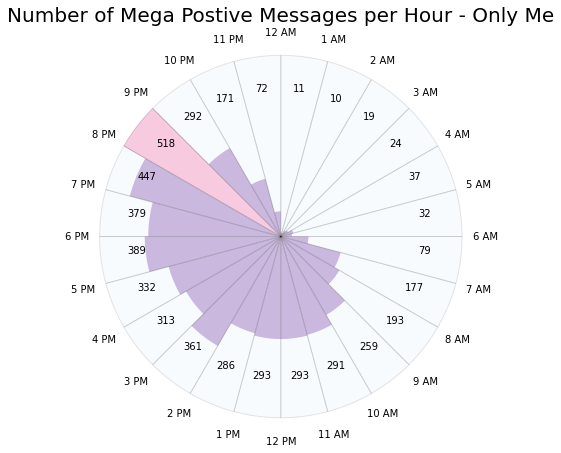

In [ ]:
# Plot circular barcharts for count of messages over hours of day
grouped = DK.groupby("hour", as_index=False)["conversationWithName"]
df_ = grouped.count()
df_.columns = ["hour", "Count"]
plot_time_circle(df_["hour"],df_["Count"],title="Number of Messages per Hour")
plt.show()

grouped = DK_sentida_pos.groupby("hour", as_index=False)["conversationWithName"]
df_ = grouped.count()
df_.columns = ["hour", "Count"]
plot_time_circle(df_["hour"],df_["Count"],title="Number of Positive Messages per Hour")
plt.show()

grouped = DK_sentida_neu.groupby("hour", as_index=False)["conversationWithName"]
df_ = grouped.count()
df_.columns = ["hour", "Count"]
plot_time_circle(df_["hour"],df_["Count"],title="Number of Neutral Messages per Hour")
plt.show()

grouped = DK_sentida_neg.groupby("hour", as_index=False)["conversationWithName"]
df_ = grouped.count()
df_.columns = ["hour", "Count"]
plot_time_circle(df_["hour"],df_["Count"],title="Number of Negative Messages per Hour")
plt.show()

grouped = DK_sentida_mega_neg.groupby("hour", as_index=False)["conversationWithName"]
df_ = grouped.count()
df_.columns = ["hour", "Count"]
plot_time_circle(df_["hour"],df_["Count"],title="Number of Mega Negative Messages per Hour")
plt.show()

grouped = DK_sentida_mega_pos.groupby("hour", as_index=False)["conversationWithName"]
df_ = grouped.count()
df_.columns = ["hour", "Count"]
plot_time_circle(df_["hour"],df_["Count"],title="Number of Mega Postive Messages per Hour")
plt.show()

#Extra just for my outgoing messages
DK_sentida_mega_neg_Me = DK_sentida_mega_neg[DK_sentida_mega_neg["outgoing"] == True]
grouped = DK_sentida_mega_neg_Me.groupby("hour", as_index=False)["conversationWithName"]
df_ = grouped.count()
df_.columns = ["hour", "Count"]
plot_time_circle(df_["hour"],df_["Count"],title="Number of Mega Negative Messages per Hour - Only Me")
plt.show()

DK_sentida_mega_pos_Me = DK_sentida_mega_pos[DK_sentida_mega_pos["outgoing"] == True]
grouped = DK_sentida_mega_pos_Me.groupby("hour", as_index=False)["conversationWithName"]
df_ = grouped.count()
df_.columns = ["hour", "Count"]
plot_time_circle(df_["hour"],df_["Count"],title="Number of Mega Postive Messages per Hour - Only Me")
plt.show()

###Who am I writing with at night

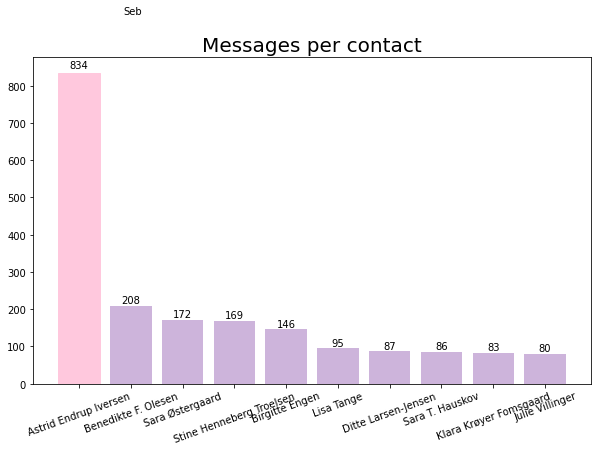

In [ ]:
# Filter for data in the middle of the night then plot with custom bar plot function
LateNight = DK
LateNight1 = LateNight[LateNight["hour"] <= 2.0]
LateNight2 = LateNight[LateNight["hour"] >= 23.0]
frames = [LateNight1, LateNight2]
LateNight = pd.concat(frames)
grouped = LateNight.groupby("conversationWithName", as_index=False)["hour"]
df_ = grouped.count()
df_.columns = ["conversationWithName", "Count"]
df_.sort_values(by=["Count"], inplace=True, ascending=False)
plot_bar(
            x=df_["conversationWithName"],
            y=df_["Count"],
            title="Messages per contact",
            max_limit=10)
plt.show()


## Per Date

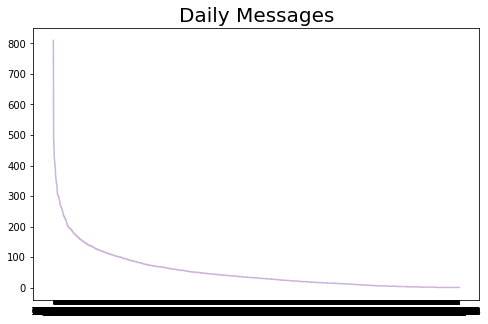

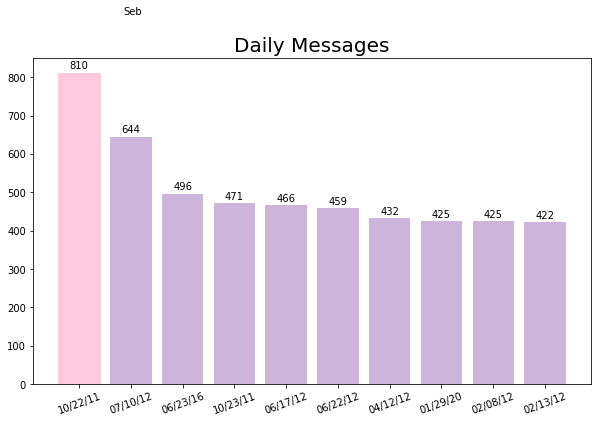

In [ ]:
# Plotting in ascending order the dates with most to least messages
grouped = DK.groupby("dater", as_index=False)["conversationWithName"]
df_ = grouped.count()
df_.columns = ["dater", "Count"]
df_.sort_values(by=["Count"], inplace=True, ascending=False)
plot_line(x=df_["dater"], y=df_["Count"], title="Daily Messages")
plt.show()

grouped = DK.groupby("dater", as_index=False)["conversationWithName"]
df_ = grouped.count()
df_.columns = ["dater", "Count"]
df_.sort_values(by=["Count"], inplace=True, ascending=False)
plot_bar(
            x=df_["dater"],
            y=df_["Count"],
            title="Daily Messages",
            max_limit=10)
plt.show()


Reminds you a little of Zipfs law?
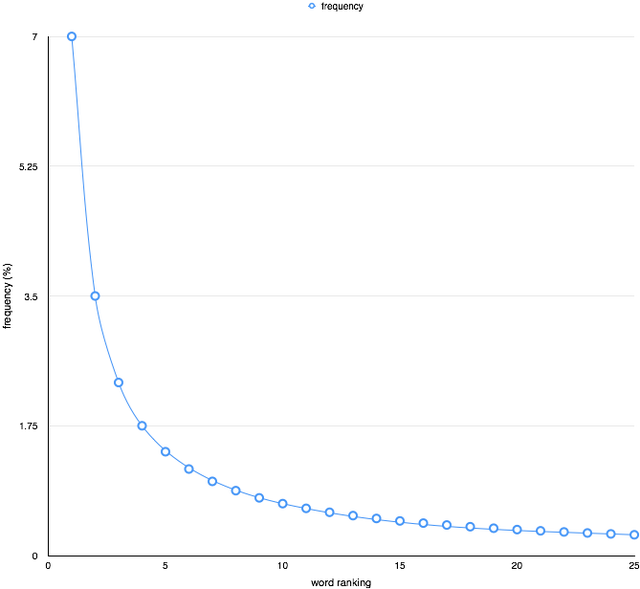

Not really

## Mean WordLenght

In [ ]:
# Making Sure It's someone I actually write with by only including people I've had more than 50 messages with
grouped = DK.groupby("conversationWithName", as_index=False)["language"]
df_exclude = grouped.count()
df_exclude.columns = ["conversationWithName", "Count"]
df_exclude.sort_values(by=["Count"], inplace=True, ascending=False)
df_exclude = df_exclude[df_exclude["Count"] <= 50]
df_exclude

,conversationWithName,Count
93,Anne Nabe-Nielsen,50
269,David Fjendbo,50
180,Camille Wagner-Eckert,49
913,Oscar Alexander Perch,49
522,Julie Musaeus Dahl,49
...,...,...
528,Julie Wathne,1
247,Christopher Glaf Stenhammer,1
1157,Thea Sejr,1
495,Jonatan Zyskind,1


In [ ]:
# Reset index
df_exclude = df_exclude.set_index('conversationWithName')
df = df.set_index('conversationWithName')

In [ ]:
# Merge list of people with 50 messages or below with maind DataFrame and drop them and their matches
df = df.drop(df_exclude.index)
df_new = pd.concat([df, df_exclude])
df=df_new
df['conversationWithName'] = df.index
len(df)

In [ ]:
#Find mean lenght of word per person and excluding myself
nan_value = float("NaN")
df.replace("", nan_value, inplace=True)
df.dropna(subset = ["hour"], inplace=True)
df.reset_index(drop=True, inplace=True)
df['mean_word_length']=pd.to_numeric(df['mean_word_length'])
df = df.merge(df[['conversationWithName','mean_word_length','outgoing']].groupby(['conversationWithName','outgoing']).mean().rename(columns={'mean_word_length':'mean_result'}),how='left',left_on=['conversationWithName','outgoing'], right_index=True) 
df =df[((df["outgoing"] == False))]
df = df.drop_duplicates(subset = ['conversationWithName','mean_result','outgoing'], keep = 'last')


In [ ]:
len(df)

388

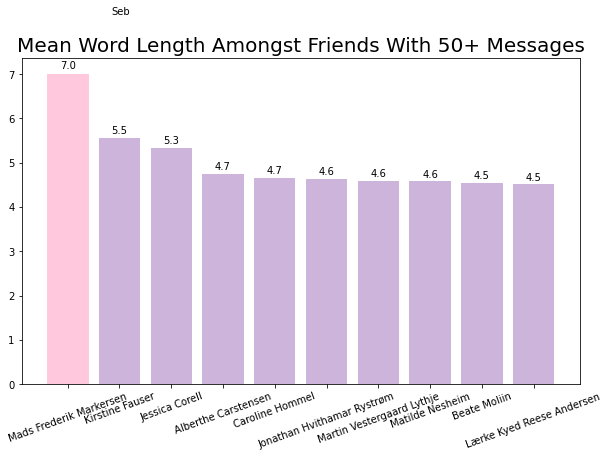

In [ ]:
#plot Highest mean lenght of word per person
df.sort_values(by=["mean_result"], inplace=True, ascending=False)
plot_bar(
            x=df["conversationWithName"],
            y=df["mean_result"],
            title="Mean Word Length Amongst Friends With 50+ Messages",
            max_limit=10)
plt.show()

## Mean Length of message

In [ ]:
# Making Sure It's someone I actually write with by only including people I've had more than 50 messages with
grouped = DK.groupby("conversationWithName", as_index=False)["language"]
df_exclude = grouped.count()
df_exclude.columns = ["conversationWithName", "Count"]
df_exclude.sort_values(by=["Count"], inplace=True, ascending=False)
df_exclude = df_exclude[df_exclude["Count"] <= 50]
df_exclude

In [ ]:
df=DK
len(df)

171599

In [ ]:
# Reset Index
df_exclude = df_exclude.set_index('conversationWithName')
df = df.set_index('conversationWithName')

In [ ]:
# Merge list of people with 50 messages or below with maind DataFrame and drop them and their matches
df = df.drop(df_exclude.index)
df_new = pd.concat([df, df_exclude])
df=df_new
df['conversationWithName'] = df.index
len(df)

161597

In [ ]:
#Find mean lenght of message per person and excluding myself
nan_value = float("NaN")
df.replace("", nan_value, inplace=True)
df.dropna(subset = ["hour"], inplace=True)
df.reset_index(drop=True, inplace=True)
df['n_tokens']=pd.to_numeric(df['n_tokens'])
df = df.merge(df[['conversationWithName','n_tokens','outgoing']].groupby(['conversationWithName','outgoing']).mean().rename(columns={'n_tokens':'mean_result'}),how='left',left_on=['conversationWithName','outgoing'], right_index=True) 
df =df[((df["outgoing"] == False))]
df = df.drop_duplicates(subset = ['conversationWithName','mean_result','outgoing'], keep = 'last')


In [ ]:
len(df)

388

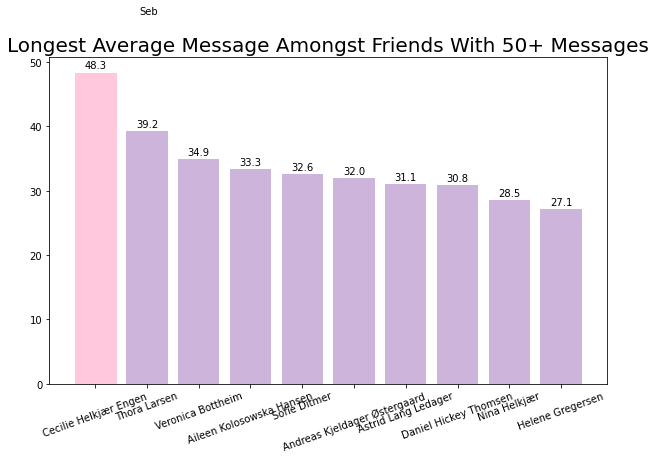

In [ ]:
# Plot using custom bar plot function
df.sort_values(by=["mean_result"], inplace=True, ascending=False)
plot_bar(
            x=df["conversationWithName"],
            y=df["mean_result"],
            title="Longest Average Message Amongst Friends With 50+ Messages",
            max_limit=10)
plt.show()

## Mean Length of message For Me

In [ ]:
# Making Sure It's someone I actually write with by only including people I've had more than 50 messages with
grouped = DK.groupby("conversationWithName", as_index=False)["language"]
df_exclude = grouped.count()
df_exclude.columns = ["conversationWithName", "Count"]
df_exclude.sort_values(by=["Count"], inplace=True, ascending=False)
df_exclude = df_exclude[df_exclude["Count"] <= 50]
df_exclude

,conversationWithName,Count
93,Anne Nabe-Nielsen,50
269,David Fjendbo,50
180,Camille Wagner-Eckert,49
913,Oscar Alexander Perch,49
522,Julie Musaeus Dahl,49
...,...,...
528,Julie Wathne,1
247,Christopher Glaf Stenhammer,1
1157,Thea Sejr,1
495,Jonatan Zyskind,1


In [ ]:
df=DK
len(df)

171599

In [ ]:
# df reset index
df_exclude = df_exclude.set_index('conversationWithName')
df = df.set_index('conversationWithName')

In [ ]:
# Merge list of people with 50 messages or below with maind DataFrame and drop them and their matches
df = df.drop(df_exclude.index)
df_new = pd.concat([df, df_exclude])
df=df_new
df['conversationWithName'] = df.index
len(df)

In [ ]:
#Find mean lenght of message per person and excluding the ingoing messages
nan_value = float("NaN")
df.replace("", nan_value, inplace=True)
df.dropna(subset = ["hour"], inplace=True)
df.reset_index(drop=True, inplace=True)
df['n_tokens']=pd.to_numeric(df['n_tokens'])
df = df.merge(df[['conversationWithName','n_tokens','outgoing']].groupby(['conversationWithName','outgoing']).mean().rename(columns={'n_tokens':'mean_result'}),how='left',left_on=['conversationWithName','outgoing'], right_index=True) 
df =df[((df["outgoing"] == True))]
df = df.drop_duplicates(subset = ['conversationWithName','mean_result','outgoing'], keep = 'last')


In [ ]:
len(df)

388

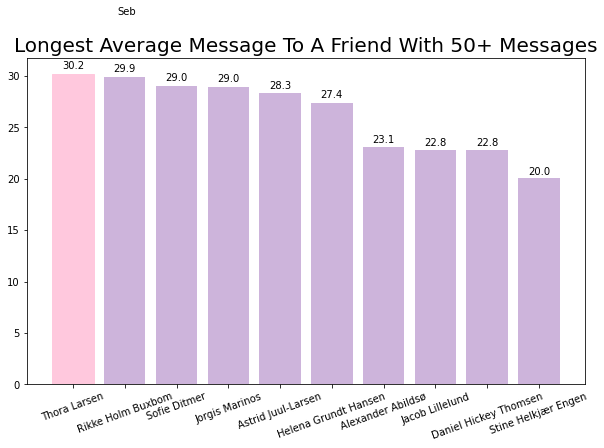

In [ ]:
# Plot using custom bar plot function
df.sort_values(by=["mean_result"], inplace=True, ascending=False)
plot_bar(
            x=df["conversationWithName"],
            y=df["mean_result"],
            title="Longest Average Message To A Friend With 50+ Messages",
            max_limit=10)
plt.show()

## Words per contact

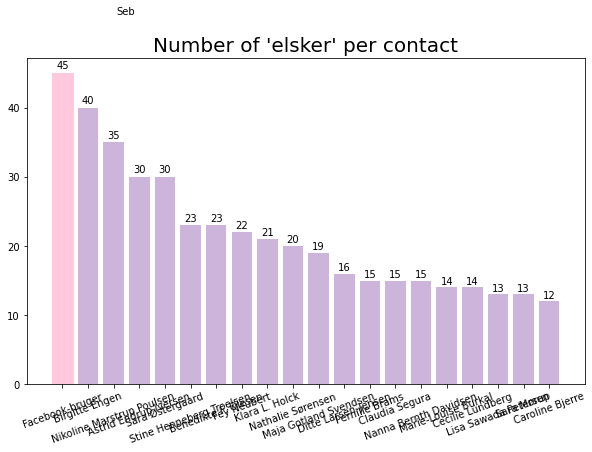

In [ ]:
# Find messages with "check_word" and count them  - then plot using custom bar plot function
check_word = ["elsker"]
word_list = []
for w in check_word:
        word_list.append(w)
        word_list.append(w.lower())
        word_list.append(w.upper())
        word_list.append(w.capitalize())
grouped = DK.groupby("conversationWithName", as_index=False)
df_list = []
for name, group in grouped:
        word_count = 0
        msgs = group["text_pros"].str.split(" ")
        for m in msgs:
            if any(x in str(m) for x in word_list):
                word_count += 1
        df_list.append([name, word_count])

df_ = pd.DataFrame(df_list, columns=["conversationWithName", "WordCount"])
df_.sort_values(by=["WordCount"], inplace=True, ascending=False)
title = "Number of '" + check_word[0] + "' per contact"
plot_bar(x=df_["conversationWithName"],
            y=df_["WordCount"],
            title=title,
            max_limit=20)

## Friends Amount 
- Timeline over friend Aquisition (New Chats)

In [ ]:
# Sort dater and keep online the first message with each person I write with
df = DK
df.sort_values(by=["dater"], inplace=True, ascending=True)
df = df.drop_duplicates(subset = ["conversationWithName"])
df.reset_index(drop=True, inplace=True)
len(df)

1227

In [ ]:
# Old TroubleShoot Codes
#df['year']=pd.to_numeric(df['year'])
#df.sort_values(by=["year"], inplace=True, ascending=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


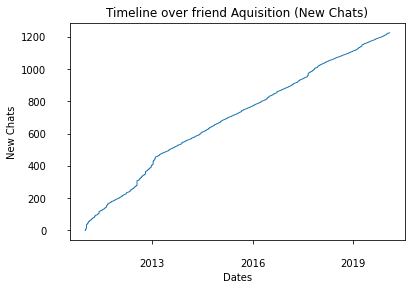

In [ ]:
# Plot line plot of newly started conversations across time
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
import urllib as u
df['index'] = df.index

ax = plt.gca()
plt.tick_params(pad=20)
ax.plot(df['dater'], df['index'], linewidth=1)
# Add title and axis names
plt.title('Timeline over friend Aquisition (New Chats)')
plt.xlabel('Dates')
plt.ylabel('New Chats')
# Add Ticks  on X-axis
plt.xticks([150,375,600], [ '2013', '2016', '2019'],va='center')
ax  


- seems like i started a bunch of new chats around 2012/2013
- this coincides with either Efterskole or Gymansium

# Topic Modelling DA
### [Guide To What Happens At Every Step](https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/)
### [Sencond part of that guiide](https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/)

## Setup

In [ ]:
# Prep Drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Install prerequisite packages
!pip install pyLDAvis
!pip install polyglot
!pip install pyicu
!pip3 install pycld2
!pip install morfessor

In [ ]:
# Load packages
#basic
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# lemmatization
from polyglot.text import Text

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

#mullet path fix
import os
from gensim.models.wrappers import LdaMallet


In [ ]:
# Load Data
DK = pd.read_csv('/content/drive/MyDrive/NLProc Exam/ALL_Chats_SentidaTested.csv')
# Deleta potential extra coloumn
DK.drop(DK.columns[0],axis=1,inplace=True)
DK.reset_index(drop=True, inplace=True)

In [ ]:
#Check
len(DK)

#### Batch

In [ ]:
#make coloumns numeric 
pd.to_numeric(DK["year"], errors='coerce')
pd.to_numeric(DK["month"], errors='coerce')
#Filter by year
Efterskole = DK[((DK["year"] == 2012) & (DK["month"] >= 8)) | ((DK["year"] == 2013) & (DK["month"] <= 5))]
Gymnasium = DK[((DK["year"] == 2014) & (DK["month"] >= 8)) | ((DK["year"] == 2015) & (DK["month"] <= 5))]
# Had a GapYear
University = DK[((DK["year"] == 2017) & (DK["month"] >= 8)) | ((DK["year"] == 2018) & (DK["month"] <= 5))]
#Filter by Friend
Friend = DK[DK["conversationWithName"] == "X X X"]

In [ ]:
# Choose Subset here by removing hashtag

#DK = Efterskole
#DK = Gymnasium
#DK = University
#DK = Friend

In [ ]:
# Check
DK

#### Pool conversation threads
Why: https://upcommons.upc.edu/bitstream/handle/2117/100796/123565.pdf?sequence=1&isAllowed=y

In [ ]:
# Test Pooling
test=DK.head()
test['text'] = test[['conversationWithName','text_pros','dater','outgoing']].groupby(['conversationWithName','dater','outgoing'])['text_pros'].transform(lambda x: ','.join(x))
test = test.drop_duplicates(subset = ['text','conversationWithName','dater','outgoing'], keep = 'last')

In [ ]:
# Check
test

In [ ]:
# Real Pooling prep
# Make sure there are no NAs
df=DK
nan_value = float("NaN")
df.replace("", nan_value, inplace=True)
df.dropna(subset = ["hour"], inplace=True)
df.reset_index(drop=True, inplace=True)
len(df['hour'])

171574

In [ ]:
# Pool based on date and author
df['text'] = df[['conversationWithName','text_pros','dater','outgoing']].groupby(['conversationWithName','dater','outgoing'])['text_pros'].transform(lambda x: ','.join(map(str, x)))
df = df.drop_duplicates(subset = ['text','conversationWithName','dater','outgoing'], keep = 'last')

# ErrorProne Line found
## print(DK.loc[19737])
# Error: "TypeError: sequence item 0: expected str instance, float found"
## https://stackoverflow.com/questions/10880813/typeerror-sequence-item-0-expected-string-int-found
# Drop NA -> Didn't work
## https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html
### Drop empty rows 
### df=DK
### nan_value = float("NaN")
### df.replace("", nan_value, inplace=True)
### df.dropna(subset = ["text_pros"], inplace=True)
### df.reset_index(drop=True, inplace=True)
### len(df['text_pros'])

# The Final Error was that I had loaded in the wrong dataset.


In [ ]:
# Check new length of pooled dataframe - Should be a lot shorter
len(df)

32057

### Tokenize

In [ ]:
#convert text tokens in dataframe to list
df_top_list = df.text.to_numpy().tolist()

In [ ]:
#Check
df_top_list[101]

In [ ]:
#function for tokenizing using Gensim
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(df_top_list))


In [ ]:
#Check
data_words

In [ ]:
#prep

# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100)
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

#Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[1]]])

/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['thx', 'basse', 'skøøøønt', 'skønt', 'det', 'skriver', 'jeg', 'ned', 'amigo']


## Gensim LDA

In [ ]:
# In case of Using data that was lemmatised yet

# Load Danish modoel - If problems look here : https://github.com/explosion/spaCy/issues/4577
!pip3 install spacy
!pip3 install https://github.com/explosion/spacy-models/releases/download//da_core_news_sm-3.0.0a0/da_core_news_sm-3.0.0a0.tar.gz # https://github.com/explosion/spacy-models/releases/tag/da_core_news_sm-3.0.0a0
# Initialize 'da' model, keeping only tagger component (for efficiency)
!python -m spacy download da_core_news_sm

# Load Spacy
import spacy
import da_core_news_sm
nlp = spacy.load('da_core_news_sm', disable=['parser', 'ner']) # https://spacy.io/models/da

In [ ]:
#Make spacy run in GPU for faster processing
#### https://stackoverflow.com/questions/56994341/is-there-any-way-to-train-spacy-on-google-colab-gpu
gpu = spacy.prefer_gpu()
print('GPU:', gpu)

GPU: True


In [ ]:
# Define functions for stopwords
from spacy.lang.da.stop_words import STOP_WORDS
# adding custom stopwords : https://stackoverflow.com/questions/41170726/add-remove-custom-stop-words-with-spacy
nlp.Defaults.stop_words |= {"pa","na","altsa","bare","sa","se","ogsa","nan"}

#Stopwords Choice: https://finnaarupnielsen.wordpress.com/2017/11/29/danish-stopword-lists/

In [ ]:
# Define functions for bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in STOP_WORDS] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# In case of Using data that was lemmatised yet
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
# Remove stopwords once more after lemmatization
data_words_nostops_second = remove_stopwords(data_lemmatized)

In [ ]:
#Check
data_words_nostops_second

#### Dictionary

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_words_nostops_second)

# Create Corpus
texts = data_words_nostops_second

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])
id2word[0]

# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]


#### Model Build

In [ ]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=14, 
                                            random_state=100,
                                            update_every=1,
                                            chunksize=100,
                                            passes=10,
                                            alpha='auto',
                                            per_word_topics=True)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)

#### pyLDAvis

In [ ]:
vis

## Mallet LDA
#### https://github.com/polsci/colab-gensim-mallet

In [ ]:
# Install Java
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null      #install openjdk
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable
  !java -version       #check java version
install_java()

In [ ]:
# Install Mallet
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip mallet-2.0.8.zip

In [ ]:
# Mallet Path
os.environ['MALLET_HOME'] = '/content/mallet-2.0.8'
mallet_path = '/content/mallet-2.0.8/bin/mallet' # you should NOT need to change this 
corpus_path = 'transcripts' # you need to change this path to the directory containing your corpus of .txt files

In [ ]:
# Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip

# Instantiate a Mallet Model
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=14, id2word=id2word)

# Show Topics
pprint(ldamallet.show_topics(formatted=False))

In [33]:
# Compute Coherence Score
from gensim.models import CoherenceModel
from gensim.models.wrappers import LdaMallet

coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)


Coherence Score:  0.6402024408520661


In [ ]:
# customfunction for finding the optimal number of topics
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values



In [ ]:
# Run model
## Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)


In [ ]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))


In [ ]:
# Select the model and print the topics
## Choose a number (Remember iit's zero indexed)
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

#### Finding the dominant topic in each sentence
One of the practical application of topic modeling is to determine what topic a given document is about.

To find that, we find the topic number that has the highest percentage contribution in that document.

The format_topics_sentences() function below nicely aggregates this information in a presentable table.

In [ ]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_lemmatized):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data_lemmatized)

In [ ]:
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

#### Find the most representative document for each topic
Sometimes just the topic keywords may not be enough to make sense of what a topic is about. So, to help with understanding the topic, you can find the documents a given topic has contributed to the most and infer the topic by reading that document. Whew!!

In [ ]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)


In [ ]:
# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()

#### Frequency Distribution of Word Counts in Documents
When working with a large number of documents, you want to know how big the documents are as a whole and by topic. Let’s plot the document word counts distribution.

In [ ]:
doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750,  90, "Median : " + str(round(np.median(doc_lens))))
plt.text(750,  80, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,1000,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.XKCD_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 100, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 100), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,100,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

#### Word Clouds of Top N Keywords in Each Topic
Though you’ve already seen what are the topic keywords in each topic, a word cloud with the size of the words proportional to the weight is a pleasant sight. 

In [ ]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.XKCD_COLORS.items()] 

cloud = WordCloud(stopwords=STOP_WORDS,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=20,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(3, 3, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

#### Word Counts of Topic Keywords
When it comes to the keywords in the topics, the importance (weights) of the keywords matters. Along with that, how frequently the words have appeared in the documents is also interesting to look.


In [ ]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_lemmatized for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.XKCD_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.20); ax.set_ylim(0, 500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

#### Sentence Chart Colored by Topic
Each word in the document is representative of one of the 14 topics. Here we  color each word in the given documents by the topic id it is attributed to.

In [ ]:
# Sentence Coloring of N Sentences
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=lda_model, corpus=corpus, start = 0, end = 13):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.XKCD_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1] 
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

sentences_chart()    

#### t-SNE Clustering Chart
Let’s visualize the clusters of documents in a 2D space using t-SNE (t-distributed stochastic neighbor embedding) algorithm.
#### **Set 'n_topics'**

In [ ]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 10
mycolors = np.array([color for name, color in mcolors.XKCD_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

#### Topic distribution across documents
Finally, we want to understand the volume and distribution of topics in order to judge how widely it was discussed. The below table exposes that information.

In [ ]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics.head()